# Bank Data Analysis

# Objective

In this case study, you will be working on Banking Data Analysis using Apache Spark, a powerful distributed computing framework designed for big data processing. This assignment aims to give you hands-on experience in analyzing large-scale banking datasets using PySpark and AWS services. You will apply techniques learned in data analytics to clean, transform, and explore banking data, drawing meaningful insights to support financial decision-making. Apart from understanding how big data tools can optimize performance on a single machine and across clusters, you will develop a structured approach to analyzing market capitalization trends, currency conversions, and global banking performance. Additionally, you will use AWS S3 to store the processed data once the ETL pipeline is complete, ensuring efficient data management and retrieval.


# Business Value

The banking industry operates in a highly competitive and globalized market where financial institutions must continuously monitor their market position, performance, and currency fluctuations. To stay competitive, banks must leverage data-driven insights to optimize their financial strategies, assess market trends, and make informed decisions. In this assignment, you will analyze banking data to uncover patterns in market capitalization, currency conversions, and global rankings. With Apache Spark's ability to handle large datasets efficiently, financial institutions can process vast amounts of data in real-time, helping them make faster and more informed decisions.


As an analyst at a financial institution, your task is to examine historical banking data to derive actionable insights that can drive strategic growth. Your analysis will help identify the top 10 largest banks by market capitalization, convert market cap values into multiple currencies (USD, GBP, EUR, INR), and store the processed data for easy retrieval. To enhance scalability and accessibility, you will utilize AWS S3 for data storage, ensuring seamless integration with cloud-based analytics tools. By leveraging big data analytics and cloud services, financial institutions can streamline operations, enhance decision-making, and maximize revenue opportunities.


# Dataset

The data for this project can be accessed from the following [wikipedia link](https://web.archive.org/web/20230908091635/https://en.wikipedia.org/wiki/List_of_largest_banks).

The dataset used in this analysis comprises global banking data extracted from a Wikipedia page (List of Largest Banks) archived as of September 2023.

It includes rankings of the world's largest banks based on market capitalization (in USD billions) and is structured into a single table with three columns. The data was scraped programmatically, cleaned, and transformed using PySpark to support cross-currency analysis. Exchange rate data (for USD, GBP, EUR, and INR) was sourced from a CSV file to enable currency conversions. The processed dataset is stored in CSV and SQLite formats for accessibility and efficient querying.

The dataset consists of a single table (Largest_banks) with the following three key attributes:
- **Rank:** Numerical position of the bank based on market capitalization.
- **Bank Name:** Name of the financial institution.
- **Market Cap (USD Billion):** Market valuation of the bank in USD billions.
This dataset enables analysis of global banking trends, cross-currency valuations, and the relative market dominance of financial institutions.

An additional data on market exchange rates is available to compare the marketcap dealing with different currencies.


<h2>Assignment Tasks</h2>

<ol>
    <li>
        <strong>Data Preparation</strong>
        <p>The dataset consists of a structured table containing global banking data. Before performing any analysis, it is crucial to prepare the data to ensure consistency and efficiency in processing.</p>
        Check for data consistency and ensure all columns are correctly formatted.<br>
        Structure and prepare the data for further processing and analysis.<br>
</br>
    <li>
        <strong>Data Cleaning</strong>
        <ul>
            2.1. <strong>Handling Missing Values:</strong> Decide on an approach to handle missing data (e.g., imputation or removal). Mention the approach in your report.<br>
            2.2. <strong>Fixing Columns:</strong> Ensure all columns are properly named and formatted.<br>
            2.3. <strong>Handling Outliers:</strong> Identify outliers in the dataset and explain why they are considered outliers. It is not necessary to remove them for this task, but mention your approach for handling them.<br>
        </ul>
</br>
    <li>
        <strong>Exploratory Data Analysis:</strong></br>
            EDA Finding Patterns - Analyze the dataset and find patterns based on the following points:
                <ul>
                    3.1. Convert PySpark DataFrame to Pandas DataFrame for visualization.<br>
                    3.2. Analyze the distribution of market capitalization using a histogram.<br>
                    3.3. Identify the top 10 banks by market capitalization using a bar chart.<br>
                    3.4. Visualize the relationship between market capitalization and bank ranking using a scatter plot.<br>
                    3.5. Use a boxplot to examine the spread and outliers in market capitalization.<br>
                    3.6. Display the quartile distribution of market capitalization using a violin plot.<br>
                    3.7. Compute cumulative market share and visualize it with a line plot.<br>
                    3.8. Categorize banks into market capitalization ranges and analyze their distribution using a bar chart.<br>
                    3.9. Calculate and display market share distribution of top 10 banks using a pie chart.<br>
                </ul>
        </ul>
</br>
    <li>
        <strong>Banking Data ETL Querying</strong>
        <ul>
            4.1. Perform Advanced Market Capitalization Analysis with Growth Metrics.<br>
            4.2. Analyze Market Concentration and Categorize Banks Based on Market Share Tiers.<br>
            4.3. Examine Statistical Distribution of Market Capitalization Using Quartile Analysis.<br>
            4.4. Conduct Comparative Size Analysis to Classify Banks by Relative Market Size.<br>
            4.5. Evaluate Market Growth and Identify Gaps Between Consecutive Banks.<br>
            4.6. Assess Market Dominance by Measuring Cumulative Share and Dominance Score.<br>
            4.7. Analyze Segment-Wise Bank Performance Based on Market Capitalization Ranges.<br>
            4.8. Generate a Comprehensive Performance Dashboard for Bank Rankings and Metrics.<br>
        </ul>
    </br>
    <li>
        <strong>Conclusion</strong></br>
            Provide final insights and recommendations based on the analysis:</br>
            <ul>
            5.1 Recommendations to track and compare market capitalisation of the top global banks toevaluate competitiveness and dominance.</br>
            5.2 Suggestions to use cross-currency analysis (USD, GBP, EUR, INR) for consistent benchmarking
of financial institutions across regions.</br>
            5.3 Propose continuous monitoring of market share concentration to identify growth opportunities
for mid-tier banks.</br>
            5.4  Identify potential regions or banking segments for expansion by analysing gaps between tiers
of banks and regional trends.</br>
            </ul>
    </br>
    <li>
        <strong>Visualization Integration [Optional]</strong>
        <p>Enhance the project by incorporating a visualization component that connects the processed data stored in an S3 bucket to a business intelligence tool such as Tableau or Power BI. This involves setting up the connection between the S3 bucket and the chosen visualization tool, importing the processed dataset for analysis and visualization, creating interactive dashboards to explore key trends and insights and ensuring data updates are reflected dynamically in the visualization tool.<br>
        </ul>
</ol>

Import Required Libraries

In [ ]:
# # Install the required libraries
!pip install --quiet pyspark==3.5.4 pandas==2.2.2

In [ ]:
# Import required libraries
import logging
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
# Import PySpark libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, round, count, when, isnull

In [ ]:
# Initialize Spark session
spark = SparkSession.builder \
    .appName("BankingDataAnalysis") \
    .getOrCreate()

#**1. Data Preparation** <font color = red>[5 marks]</font> <br>


The data for this project can be accessed from the wikipedia link provided above. The page features data regarding global banking data.

Utilise the pandas method to read tables from the html document
and extract the requried data consists of a structured format.

Before performing any analysis, it is crucial to prepare the data to ensure consistency, and efficiency in processing.

In [ ]:
#Logging Function
def logging_progress(msg):
    timeformat = '%Y-%h-%d-%H:%M:%S'
    timestamp = datetime.now().strftime(timeformat)
    logpath='/content/sample_data/IIIT_Assignments/Banking/Banking_Analysis.txt'
    os.makedirs(os.path.dirname(logpath), exist_ok=True)
    with open(logpath, 'a') as f:
        f.write(f"{timestamp} : {msg}\n")

In [ ]:
# Initialize Spark session
spark = SparkSession.builder \
    .appName("BankingDataAnalysis") \
    .getOrCreate()

# URL of the Wikipedia page
wiki_url = "https://web.archive.org/web/20230908091635/https://en.wikipedia.org/wiki/List_of_largest_banks"
# Use pandas to read all HTML tables from the page
try:
  load_tables = pd.read_html(wiki_url)
  logging_progress(f"Bank Data Loaded Successfully")
except Exception as e:
  logging_progress(f"Error in Loading Bank Data: {str(e)}")
# Load the correct table (Table 1)
wiki_df = load_tables[1]
# Convert pandas DataFrame to PySpark DataFrame
wiki_spark_df = spark.createDataFrame(wiki_df)
logging_progress("Bank Data Loaded Successfully }")
# Rename columns
wiki_spark_df = wiki_spark_df.withColumnRenamed("Bank name", "Bank_Name") \
                             .withColumnRenamed("Market cap (US$ billion)", "Market_Cap_USD_Billion")
logging_progress("Bank Data Renamed Successfully")
# Show the first few rows of the PySpark DataFrame
print("Top 3 Rows")
wiki_spark_df.show(3)
# Print the schema of the DataFrame
print("Bank Schema")
wiki_spark_df.printSchema()
# Configure logging
logging_progress("Logging configured with function logging_progress(msg)")
logging_progress("Data Preparation Completed")


Top 3 Rows
+----+--------------------+----------------------+
|Rank|           Bank_Name|Market_Cap_USD_Billion|
+----+--------------------+----------------------+
|   1|      JPMorgan Chase|                432.92|
|   2|     Bank of America|                231.52|
|   3|Industrial and Co...|                194.56|
+----+--------------------+----------------------+
only showing top 3 rows

Bank Schema
root
 |-- Rank: long (nullable = true)
 |-- Bank_Name: string (nullable = true)
 |-- Market_Cap_USD_Billion: double (nullable = true)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the data for exchange rates

In [ ]:
# Load the exchange rate data
try:
  exchange_rate_df = spark.read.csv("/content/sample_data/IIIT_Assignments/Banking/exchange_rate(in).csv", header=True, inferSchema=True)
  logging_progress("Exchange Rate Data Loading completed")
except Exception as e:
  logging_progress("Loading failed!!! Errors Details: {e}")
# Show the first few rows of the exchange rate data to verify
print("Exchange Rate Data\n")
exchange_rate_df.show(3)


Exchange Rate Data

+--------+-----+
|Currency| Rate|
+--------+-----+
|     EUR| 0.93|
|     GBP|  0.8|
|     INR|82.95|
+--------+-----+



#**2. Data Cleaning** <font color = red>[20 marks]</font> <br>

##**2.1 Handle Missing Values** <font color = red>[10 marks]</font> <br>


In [ ]:
# Print the schema to check data types
print("Bank Schema")
wiki_spark_df.printSchema()

Bank Schema
root
 |-- Rank: long (nullable = true)
 |-- Bank_Name: string (nullable = true)
 |-- Market_Cap_USD_Billion: double (nullable = true)



In [ ]:
# Check for missing values
missing_values = wiki_spark_df.select(
    [count(when(isnull(c),c)).alias(c) for c in wiki_spark_df.columns]
)
logging_progress("Missing Values Checked")
missing_values.show()

+----+---------+----------------------+
|Rank|Bank_Name|Market_Cap_USD_Billion|
+----+---------+----------------------+
|   0|        0|                     0|
+----+---------+----------------------+



In [ ]:
# Drop rows with missing values
logging_progress(f"Rows before dropping missing values: {wiki_spark_df.count()}")
count_records=wiki_spark_df.count()
wiki_spark_df = wiki_spark_df.dropna()
if wiki_spark_df.count() == count_records:
  logging_progress("No missing values found")
else:
  logging_progress(f"Rows after dropping missing values: {wiki_spark_df.count()}")


##**2.2 Fixing Columns** <font color = red>[5 marks]</font> <br>


The Market cap is already in numeric so no conversion needed.

In [ ]:
# Count the total number of rows
logging_progress(f"Total number of rows: {wiki_spark_df.count()}")
# Check if there are duplicates
if wiki_spark_df.count() == wiki_spark_df.dropDuplicates().count():
  logging_progress("No duplicates found")
else:
  logging_progress("Duplicates found")
  # Drop duplicates
  wiki_spark_df = wiki_spark_df.dropDuplicates()
  logging_progress("Duplicates dropped")


##**2.2 Handle Outliers** <font color = red>[5 marks]</font> <br>


In [ ]:
# Write code for outlier analysis
quantiles = wiki_spark_df.approxQuantile("Market_Cap_USD_Billion", [0.25, 0.75],0.1)
Q1, Q3 = quantiles[0], quantiles[1]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = wiki_spark_df.filter((col("Market_Cap_USD_Billion") < lower_bound) | (col("Market_Cap_USD_Billion") > upper_bound))
outliers.show()

+----+--------------+----------------------+
|Rank|     Bank_Name|Market_Cap_USD_Billion|
+----+--------------+----------------------+
|   1|JPMorgan Chase|                432.92|
+----+--------------+----------------------+



### 📊 Observations: Suyash Nagar

- **JPMorgan Chase**, with a market capitalization of **$432.92B**, emerges as a significant outlier in the global banking landscape.




Saving the Cleaned Dataset into a CSV File into the S3 Bucket


In [ ]:
import os
os.environ['AWS_ACCESS_KEY_ID'] = 'Insert Key'
os.environ['AWS_SECRET_ACCESS_KEY'] = 'Insert Secret'

In [ ]:
!pip install boto3 --quiet

In [ ]:
import boto3
from io import BytesIO

def upload_df(df,file_name):
    """
    Uploads a Pandas DataFrame to a predefined S3 bucket and Google Drive path.
    """
    # Predefined paths
    s3_bucket = "myaswss3bucket"
    s3_path = f"BankingDataSet/{file_name+'.csv'}"
    drive_path = f"/content/sample_data/IIIT_Assignments/{file_name+'.csv'}"

    try:
        # Save to Google Drive
        df.to_csv(drive_path, index=False)
        print(f"Saved to Google Drive at: {drive_path}")

        # Prepare in-memory buffer
        buffer = BytesIO()
        df.to_csv(buffer, index=False)
        buffer.seek(0)

        # Upload to S3
        s3_client = boto3.client('s3')
        s3_client.upload_fileobj(buffer, s3_bucket, s3_path)
        print(f"Uploaded to S3: s3://{s3_bucket}/{s3_path}")

    except Exception as e:
        print(f"Upload failed: {e}")


In [ ]:
df= wiki_spark_df.toPandas()
# Upload Cleansed Data to AWS S3
upload_df(df, "cleansed") # upload to S3

Saved to Google Drive at: /content/sample_data/IIIT_Assignments/cleansed.csv
Uploaded to S3: s3://myaswss3bucket/BankingDataSet/cleansed.csv


#**3. Exploratory Data Analysis** <font color = red>[40 marks]</font> <br>


##**3.1. Conversion from PySpark to Pandas DataFrame** <font color = red>[5 marks]</font> <br>

Convert PySpark DataFrame to Pandas DataFrame for visualization

In [ ]:
# Convert PySpark DataFrame to Pandas DataFrame
bank_pd_df = wiki_spark_df.toPandas()

##**3.2. Market Capitalization** <font color = red>[5 marks]</font> <br>

Analyze the distribution of market capitalization using a histogram

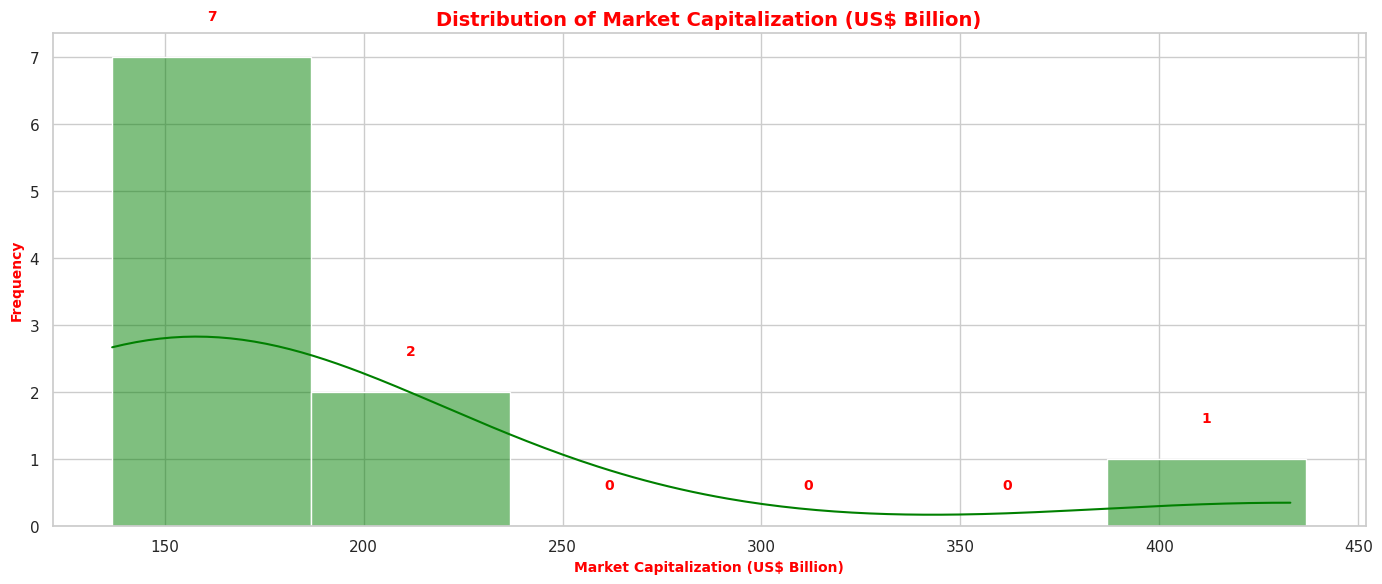

In [ ]:
# Distribution of Market Cap (US$ Billion)

# Set the style for seaborn
sns.set(style="whitegrid")
# Plot the distribution of market cap
min_market_cap = bank_pd_df["Market_Cap_USD_Billion"].min()
max_market_cap = bank_pd_df["Market_Cap_USD_Billion"].max()
bin_edge = np.arange(start=min_market_cap, stop=max_market_cap + 50, step=50)
plt.figure(figsize=(14, 6))
sns.histplot(bank_pd_df["Market_Cap_USD_Billion"], bins=bin_edge, kde=True,color='green')
counts, _ = np.histogram(bank_pd_df["Market_Cap_USD_Billion"], bins=bin_edge)
for count, left, right in zip(counts, bin_edge[:-1], bin_edge[1:]):
    x = (left + right) / 2
    y = count
    plt.text(x, y + 0.5, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold', color='red')
plt.title("Distribution of Market Capitalization (US$ Billion)", fontsize=14, weight='bold',color='red')
plt.xlabel("Market Capitalization (US$ Billion)",fontsize=10, fontweight='bold', color='red')
plt.ylabel("Frequency",fontsize=10, fontweight='bold', color='red')
plt.tight_layout()
plt.show()

### 📊 Observations: Suyash Nagar
-	70% of Banks lies in lower range of 125-175 billion, followed by 20% in 175 – 225 billion and only 10% in 400+ Billion
- In 225- 375 billion range there are no Banks


##**3.3. Top 10 Banks** <font color = red>[5 Marks]</font> <br>

Identify the top 10 banks by market capitalization using a bar chart

Top 10 Banks by Market Cap:
   Rank                                Bank_Name  Market_Cap_USD_Billion
0     1                           JPMorgan Chase                  432.92
1     2                          Bank of America                  231.52
2     3  Industrial and Commercial Bank of China                  194.56
3     4               Agricultural Bank of China                  160.68
4     5                                HDFC Bank                  157.91
5     6                              Wells Fargo                  155.87
6     7                        HSBC Holdings PLC                  148.90
7     8                           Morgan Stanley                  140.83
8     9                  China Construction Bank                  139.82
9    10                            Bank of China                  136.81


/tmp/ipython-input-3240739989.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Bank_Name", y="Market_Cap_USD_Billion", data=top_10_banks, palette="viridis")


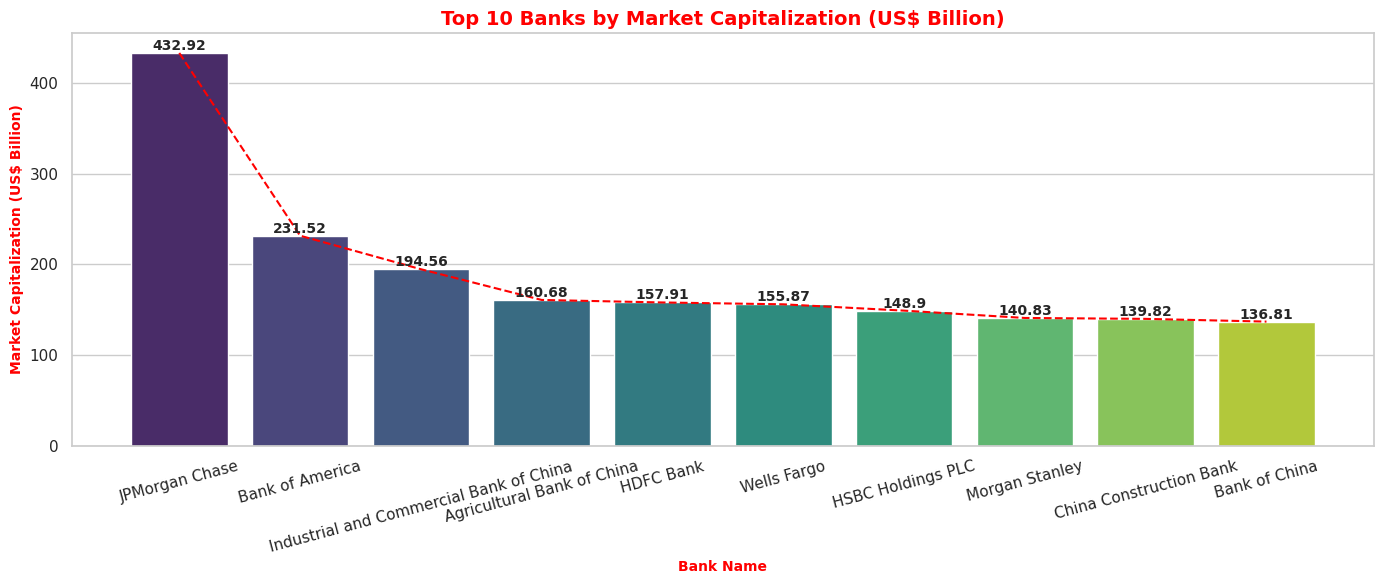

In [ ]:
# Top 10 Banks by Market Cap

# Sort the DataFrame by market cap in descending order
top_10_banks = bank_pd_df.sort_values(by="Market_Cap_USD_Billion", ascending=False)
# Select the top 10 banks
top_10_banks = bank_pd_df.head(10)
print("Top 10 Banks by Market Cap:")
print(top_10_banks)
logging_progress(f"Top 10 Banks by Market Cap: {top_10_banks}")
# Plot the top 10 banks by market cap
plt.figure(figsize=(14, 6))
sns.barplot(x="Bank_Name", y="Market_Cap_USD_Billion", data=top_10_banks, palette="viridis")
sns.lineplot(x="Bank_Name", y="Market_Cap_USD_Billion", data=top_10_banks, color="red", linestyle="--")
# Add data labels
for i, row in bank_pd_df.head(10).iterrows():
    plt.text(i, row["Market_Cap_USD_Billion"], str(row["Market_Cap_USD_Billion"]), ha="center", va="bottom", fontsize=10, fontweight="bold")
plt.title("Top 10 Banks by Market Capitalization (US$ Billion)", fontsize=14, weight='bold',color='red')
plt.xlabel("Bank Name",fontsize=10, fontweight='bold', color='red')
plt.ylabel("Market Capitalization (US$ Billion)",fontsize=10, fontweight='bold', color='red')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### 📊 Observations: Suyash Nagar
-	JP Morgan being leader by a wide margin, clearly dominating global banks
-	With Redline clear indication of sharp decline can be observed
-	Overall market is dominated by US and China Bank and India being there with HDFC


##**3.4. Market Cap vs Bank Ranking** <font color = red>[5 Marks]</font> <br>

Visualize the relationship between market capitalization and bank ranking using a scatter plot

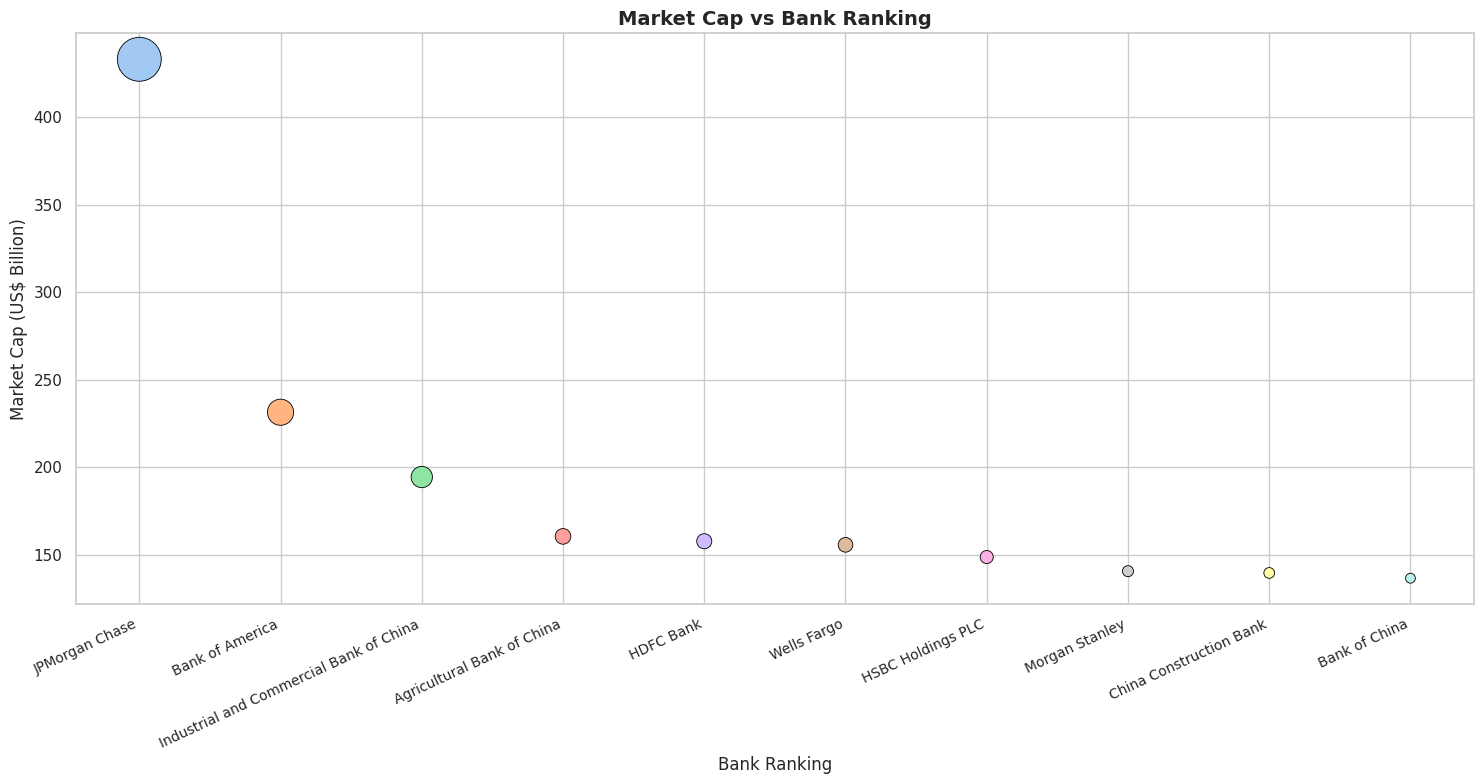

In [ ]:
# Market Cap vs Rank

# Plot market cap vs rank
plt.figure(figsize=(15, 8))
sns.scatterplot(data=bank_pd_df,x='Rank', y='Market_Cap_USD_Billion',size='Market_Cap_USD_Billion',hue='Bank_Name',palette="pastel",sizes=(50, 1000),legend=False,edgecolor="black")
# Replace x-axis ticks with bank names
plt.xticks(ticks=bank_pd_df['Rank'],labels=bank_pd_df['Bank_Name'],rotation=25,ha='right',fontsize=10)
plt.title("Market Cap vs Bank Ranking", fontsize=14, weight='bold')
plt.xlabel("Bank Ranking")
plt.ylabel("Market Cap (US$ Billion)")
plt.tight_layout()
plt.show()


### 📊 Observations: Suyash Nagar
-	Bubble Chart between Bank global ranking and Market Capitalization (USD), represents the magnitude in capitalization
-	Clear steep drop from rank 1 and 2 is visible by sheer size and drop
-	Lower order banks are in near cluster


##**3.5. Market Cap Analysis** <font color = red>[5 Marks]</font> <br>

Use a boxplot to examine the spread and outliers in market capitalization.

Mean: 189.982
Median: 156.89
Q1: 142.84750000000003
Q3: 186.09
IQR: 43.24249999999998
MIN: 136.81
MAX: 432.92


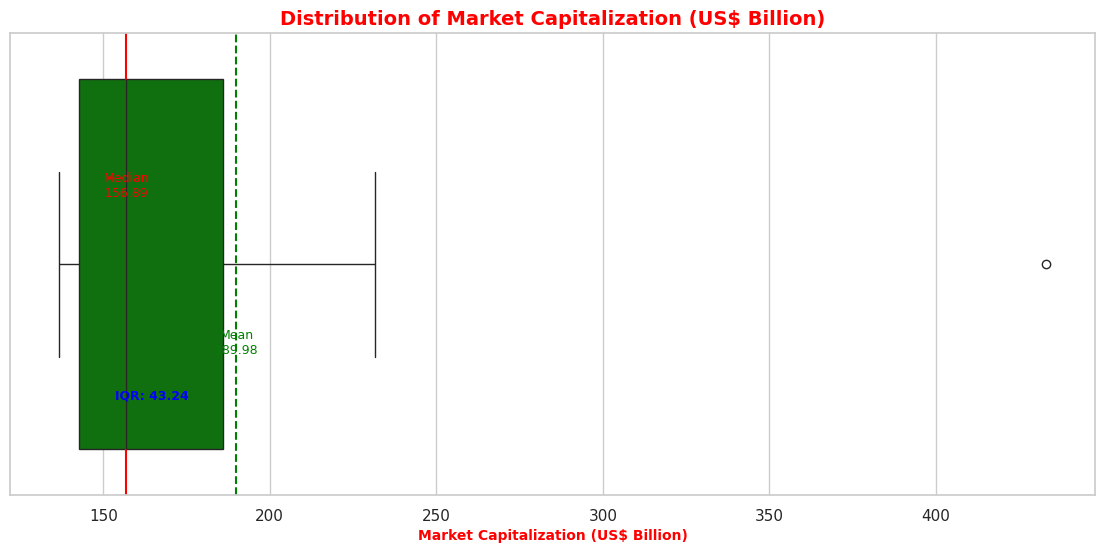

In [ ]:
# Boxplot of Market Cap
#To show the spread and outliers in the market capitalization data.
mean_val = bank_pd_df['Market_Cap_USD_Billion'].mean()
median_val = bank_pd_df['Market_Cap_USD_Billion'].median()
Q1 = bank_pd_df['Market_Cap_USD_Billion'].quantile(0.25)
Q3 = bank_pd_df['Market_Cap_USD_Billion'].quantile(0.75)
IQR = Q3 - Q1
min_val = bank_pd_df['Market_Cap_USD_Billion'].min()
max_val = bank_pd_df['Market_Cap_USD_Billion'].max()
print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"MIN: {min_val}")
print(f"MAX: {max_val}")
# Plot a boxplot of market cap
logging_progress(f"Mean: {mean_val}, Median: {median_val}, Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, MIN: {min_val}, MAX: {max_val}")
plt.figure(figsize=(14, 6))
sns.boxplot(x=bank_pd_df["Market_Cap_USD_Billion"], color="green")
plt.axvline(mean_val, color='green', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='red', linestyle='-', label=f'Median: {median_val:.2f}')
plt.text(mean_val, 0.2, f'Mean\n{mean_val:.2f}', color='green', ha='center', va='bottom', fontsize=9)
plt.text(median_val, -0.2, f'Median\n{median_val:.2f}', color='red', ha='center', va='top', fontsize=9)
# Annotate IQR
plt.text((Q1 + Q3) / 2, 0.3, f'IQR: {IQR:.2f}', color='blue', ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.title("Distribution of Market Capitalization (US$ Billion)", fontsize=14, weight='bold',color='red')
plt.xlabel("Market Capitalization (US$ Billion)",fontsize=10, fontweight='bold', color='red')
plt.show()


### 📊 Observations: Suyash Nagar
- With $432.92B, JP Morgan chase is statistically isolated and outlier

- Median: ~$156.89B
- Mean: ~$189.98B (pulled upward by JPMorgan)
- Outlier: JPMorgan Chase, far beyond the upper quartile


##**3.6. Market Cap Quartile Distribution** <font color = red>[5 Marks]</font> <br>

Display the quartile distribution of market capitalization using a violin plot.

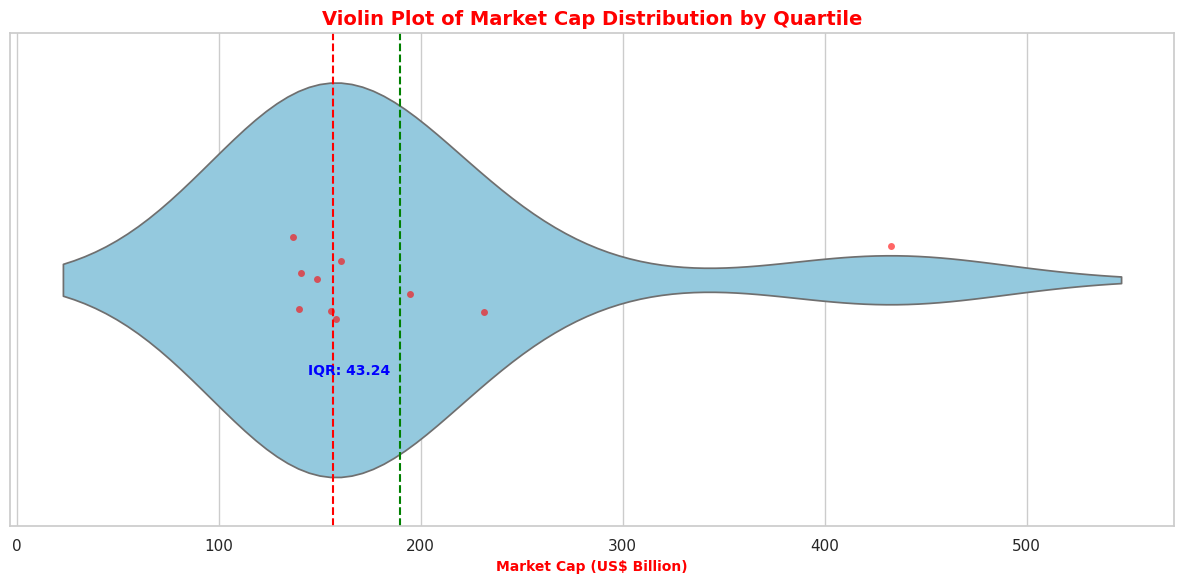

In [ ]:
# Market Cap Distribution by Quartile
plt.figure(figsize=(12, 6))
sns.violinplot(x=bank_pd_df['Market_Cap_USD_Billion'], color="skyblue",inner=None)
sns.stripplot(x=bank_pd_df['Market_Cap_USD_Billion'], color="red", size=5,jitter=True,alpha=0.6)
plt.axvline(bank_pd_df['Market_Cap_USD_Billion'].mean(), color='green', linestyle='--', label=f'Mean: {bank_pd_df["Market_Cap_USD_Billion"].mean():.2f}')
plt.axvline(bank_pd_df['Market_Cap_USD_Billion'].median(), color='red', linestyle='--', label=f'Median: {bank_pd_df["Market_Cap_USD_Billion"].median():.2f}')
# Annotate IQR
plt.text((Q1 + Q3) / 2, 0.2, f'IQR: {IQR:.2f}', color='blue', ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title('Violin Plot of Market Cap Distribution by Quartile', fontsize=14, weight='bold',color='red')
plt.xlabel('Market Cap (US$ Billion)', fontsize=10, weight='bold',color='red')
plt.tight_layout()
plt.show()

📊 Observations: Suyash Nagar

-	Violin plot is bottom heavy, clearly showing right- skewed distribution

-	Most banks are concentrated in lower quartile, which could be seen with density bulge(150-200) Billion towards bottom

-	Long tail to right due to heavy outlier of JP Morgan Chase


##**3.7. Cumulative Market Share Analysis** <font color = red>[5 Marks]</font> <br>

Compute cumulative market share and visualize it with a line plot.

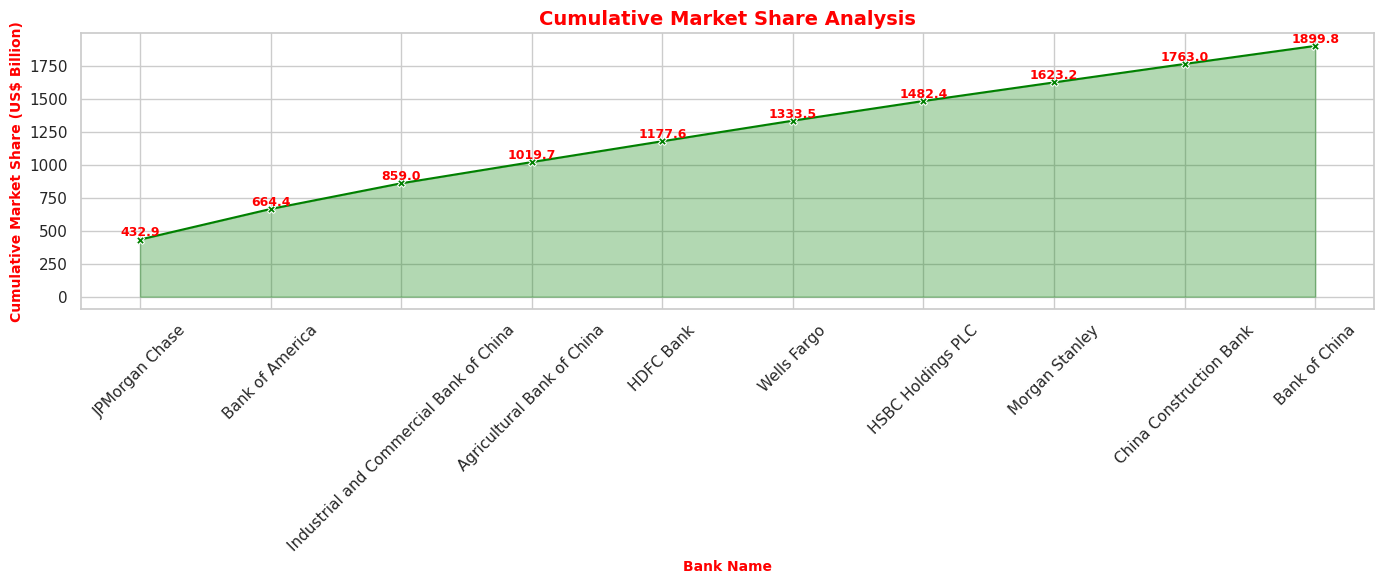

In [ ]:
# Cumulative Market Share
bank_pd_df['Cumulative_Market_Share_USD_Billion'] = bank_pd_df['Market_Cap_USD_Billion'].cumsum()
# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=bank_pd_df, x='Bank_Name', y='Cumulative_Market_Share_USD_Billion', color='green',marker='X')
plt.fill_between(bank_pd_df['Bank_Name'],bank_pd_df['Cumulative_Market_Share_USD_Billion'],color='green',alpha=0.3)
# Add data point labels
for i in range(len(bank_pd_df)):
    bank = bank_pd_df.iloc[i]['Bank_Name']
    value = bank_pd_df.iloc[i]['Cumulative_Market_Share_USD_Billion']
    plt.text(bank,value + 1, f'{value:.1f}',ha='center',va='bottom',fontsize=9,fontweight='bold',color='red')
plt.xticks(rotation=45)
plt.title('Cumulative Market Share Analysis', fontsize=14, weight='bold',color='red')
plt.xlabel('Bank Name', fontsize=10, weight='bold',color='red')
plt.ylabel('Cumulative Market Share (US$ Billion)', fontsize=10, weight='bold',color='red')
plt.tight_layout()
plt.show()

📊 Observations: Suyash Nagar

-	J.P Morgan Chase is setting initial jump of (432) Billion setting dominant tone

-	The slope flattens slightly after JP Morgan and Bank of America, showing lower contribution from rank 3 onwards

-	The final cumulative total reached $1889.8 Billion


##**3.8. Categorising Banks** <font color = red>[5 Marks]</font> <br>

Categorize banks into market capitalization ranges and analyze their distribution using a bar chart.

/tmp/ipython-input-2218053686.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range_counts.index, y=range_counts.values, palette="viridis")


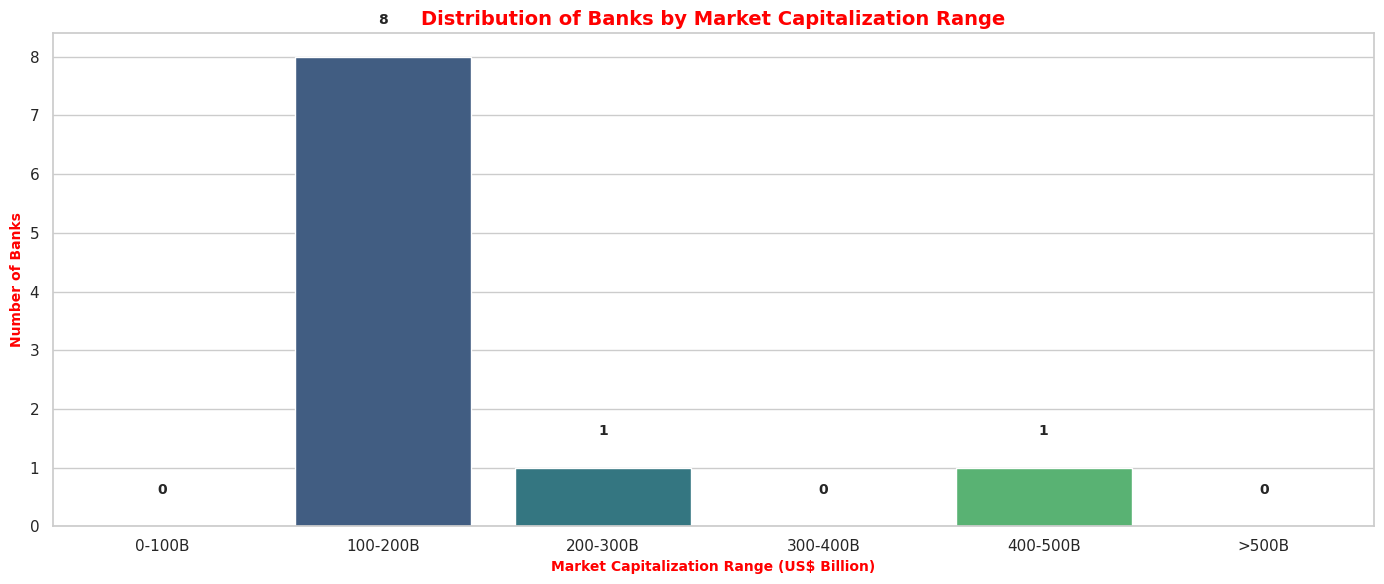

In [ ]:
# Market Cap Range Distribution
# Create market cap ranges
#define ranges
bins = [0, 100, 200, 300, 400, 500, float('inf')]
labels = ['0-100B', '100-200B', '200-300B', '300-400B', '400-500B', '>500B']
bank_pd_df['Market_Cap_Range'] = pd.cut(bank_pd_df['Market_Cap_USD_Billion'], bins=bins, labels=labels, right=False)
range_counts = bank_pd_df['Market_Cap_Range'].value_counts().sort_index()
# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x=range_counts.index, y=range_counts.values, palette="viridis")
for i, count in enumerate(range_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title("Distribution of Banks by Market Capitalization Range",fontsize=14, weight='bold',color='red')
plt.xlabel("Market Capitalization Range (US$ Billion)",fontsize=10, weight='bold',color='red')
plt.ylabel("Number of Banks",fontsize=10, weight='bold',color='red')
plt.tight_layout()
plt.show()

📊 Observations: Suyash Nagar

- Bar chart yet again confirms strong concentration od banks in lower ranks with 100-200 Billion range

-	Only Bank of America is in 200+ Club and JP Morgan leading club by 400+ making it a global leader


##**3.9. Visualise Market Share Distribution** <font color = red>[5 Marks]</font> <br>


Calculate and display market share distribution among the top 10 banks using a pie chart.

<Figure size 1400x600 with 0 Axes>

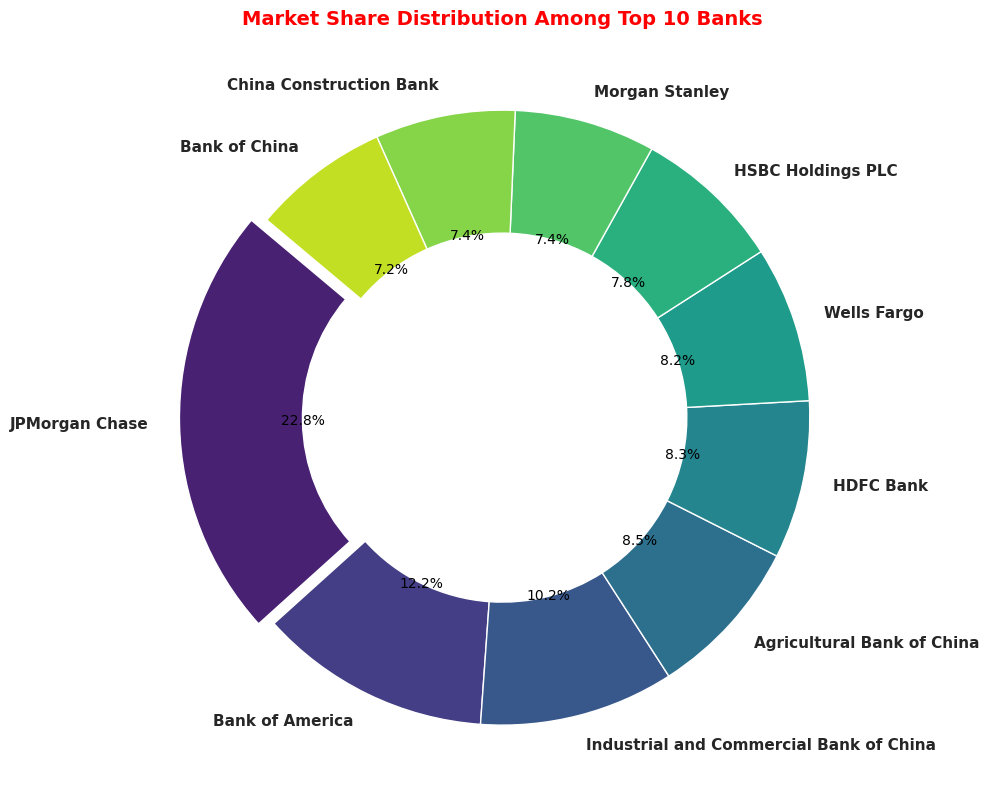

In [ ]:
# Top 10 Banks Market Share
# Calculate market share percentage for top 10 banks
bank_pd_df['Market_Share_%'] = np.round((bank_pd_df['Market_Cap_USD_Billion'] / bank_pd_df['Market_Cap_USD_Billion'].sum() * 100),2)
# Plot
colors = sns.color_palette('viridis', len(bank_pd_df))
explode= [0.05 if i==0 else 0 for i in range(len(bank_pd_df))]
plt.figure(figsize=(14, 6))
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    bank_pd_df['Market_Share_%'],
    labels=bank_pd_df['Bank_Name'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    wedgeprops=dict(width=0.4, edgecolor='white')
)
for text in texts:
    text.set_fontsize(11)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('black')
plt.title("Market Share Distribution Among Top 10 Banks",fontsize=14, weight='bold',color='red')
plt.tight_layout()
plt.show()


📊 Observations: Suyash Nagar

- Donut Chart highlights market share hierarchy, with JP Morgan taking biggest slice of cake with 22.8%

- The next major contributor is Bank of America with 12.2

- Remaining banks share between 10% - 7%


In [ ]:
#Write updated DataSet to AWS S3 and Google drive
upload_df(bank_pd_df,"processed")

Saved to Google Drive at: /content/sample_data/IIIT_Assignments/processed.csv
Uploaded to S3: s3://myaswss3bucket/BankingDataSet/processed.csv


End of Section 3 Proccessed data s=is updated in AWS S3

#**4. ETL and Querying** <font color = red>[45 marks]</font> <br>

In [ ]:
#Imports & Spark Session Initialization

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit, round
import logging
from datetime import datetime
import sqlite3
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("BankingDataAnalysis") \
    .getOrCreate()

# Logging Configuration
logfile = "code_log.txt"

In [ ]:
#Logging Function

def log_progress(msg):
    timeformat = '%Y-%h-%d-%H:%M:%S'
    timestamp = datetime.now().strftime(timeformat)
    with open(logfile, 'a') as f:
        f.write(f"{timestamp} : {msg}\n")

In [ ]:
def read_spark_df_from_s3(file_name):
    """
    Reads a CSV file from a predefined S3 bucket and path prefix using the given file name.
    Returns a Spark DataFrame.

    Parameters:
    - file_name: Name of the CSV file (e.g., 'final_data.csv')
    """
    # Predefined S3 bucket and folder
    s3_bucket = "myaswss3bucket"
    s3_prefix = "BankingDataSet/"

    try:
        # Full S3 path
        s3_path = s3_prefix + file_name

        # Download file from S3 into memory
        s3_client = boto3.client('s3')
        buffer = BytesIO()
        s3_client.download_fileobj(s3_bucket, s3_path, buffer)
        buffer.seek(0)

        # Convert to Pandas DataFrame
        pandas_df = pd.read_csv(buffer)

        # Convert to Spark DataFrame
        spark = SparkSession.builder.appName("ReadFromS3").getOrCreate()
        spark_df = spark.createDataFrame(pandas_df)

        print(f"Successfully loaded Spark DataFrame from s3://{s3_bucket}/{s3_path}")
        return spark_df

    except Exception as e:
        print(f"Error reading file '{file_name}' from S3: {e}")
        return None

In [ ]:
# Load the exchange rate data
try:
  exchange_rate_df = spark.read.csv("/content/sample_data/IIIT_Assignments/Banking/exchange_rate(in).csv", header=True, inferSchema=True)
  logging_progress("Exchange Rate Data Loading completed")
except Exception as e:
  logging_progress("Loading failed!!! Errors Details: {e}")
# Show the first few rows of the exchange rate data to verify
print("Exchange Rate Data\n")
exchange_rate_df.show(3)
# Load earleier cleansed data from S3
try:
  print("Proccessed Data\n")
  spark_df = read_spark_df_from_s3("processed.csv")
  #spark_df = spark.createDataFrame(bank_pd_df)
  spark_df.show()
  logging_progress("Processed Data Loading completed")
except Exception as e:
  logging_progress("Loading failed!!! Errors Details: {e}")

# Convert exchange_rate_df to Dictionary
currency_rate={row['Currency']:row['Rate'] for row in exchange_rate_df.collect()}
# Add converted market cap columns
spark_df = spark_df.withColumn("Market_Cap_EUR_Billion", round(col("Market_Cap_USD_Billion") * currency_rate['EUR'], 2)) \
                 .withColumn("Market_Cap_GBP_Billion", round(col("Market_Cap_USD_Billion") * currency_rate['GBP'], 2)) \
                 .withColumn("Market_Cap_INR_Billion", round(col("Market_Cap_USD_Billion") * currency_rate['INR'], 2))

# Log success
logging_progress("Added Market Cap columns in EUR, GBP, and INR.")
spark_df.show(3)


Exchange Rate Data

+--------+-----+
|Currency| Rate|
+--------+-----+
|     EUR| 0.93|
|     GBP|  0.8|
|     INR|82.95|
+--------+-----+

Proccessed Data

Successfully loaded Spark DataFrame from s3://myaswss3bucket/BankingDataSet/processed.csv
+----+--------------------+----------------------+-----------------------------------+----------------+--------------+
|Rank|           Bank_Name|Market_Cap_USD_Billion|Cumulative_Market_Share_USD_Billion|Market_Cap_Range|Market_Share_%|
+----+--------------------+----------------------+-----------------------------------+----------------+--------------+
|   1|      JPMorgan Chase|                432.92|                             432.92|        400-500B|         22.79|
|   2|     Bank of America|                231.52|                             664.44|        200-300B|         12.19|
|   3|Industrial and Co...|                194.56|                              859.0|        100-200B|         10.24|
|   4|Agricultural Bank...|            

In [ ]:
# Original column order
original_cols = spark_df.columns
#  Move columsn 'Cumulative_Market_Share_USD_Billion','Market_Share_%' to last
cols_to_move = ['Cumulative_Market_Share_USD_Billion','Market_Cap_Range','Market_Share_%']
new_order = [col for col in original_cols if col not in cols_to_move] + cols_to_move
df_reordered = spark_df.select(*new_order)
df_reordered.show()
df_pd = df_reordered.toPandas()
#upload_df(df_pd,"processed")


+----+--------------------+----------------------+----------------------+----------------------+----------------------+-----------------------------------+----------------+--------------+
|Rank|           Bank_Name|Market_Cap_USD_Billion|Market_Cap_EUR_Billion|Market_Cap_GBP_Billion|Market_Cap_INR_Billion|Cumulative_Market_Share_USD_Billion|Market_Cap_Range|Market_Share_%|
+----+--------------------+----------------------+----------------------+----------------------+----------------------+-----------------------------------+----------------+--------------+
|   1|      JPMorgan Chase|                432.92|                402.62|                346.34|              35910.71|                             432.92|        400-500B|         22.79|
|   2|     Bank of America|                231.52|                215.31|                185.22|              19204.58|                             664.44|        200-300B|         12.19|
|   3|Industrial and Co...|                194.56|          

📊 Observations: Suyash Nagar

-	Load data from S3

-	Perform Currency Calculations


In [ ]:
import sqlite3
# Write data to SQL Database
def write_SQLLite(df, dbname, table_name):
    df_SQL_pd = df.toPandas()
    conn = sqlite3.connect(dbname)
    df_SQL_pd.to_sql(table_name, conn, if_exists='replace', index=False)
    conn.close()
    print(f"Data written to SQLite table '{table_name}' in database '{dbname}'")

In [ ]:
#Read Data from SQL
def read_SQLLite(queries, dbname):
    conn = sqlite3.connect(dbname)
    for query in queries:
        print(f"\nExecuting: {query}")
        df = pd.read_sql_query(query, conn)
        print(df)
    conn.close()


In [ ]:
# Main ETL pipeline
if __name__ == "__main__":
    # Read processed data from S3
    #spark_df = read_spark_df_from_s3("processed.csv")
    spark_df = df_reordered
    spark_df.show()

    # SQLite config
    table_name = "Banks_Analysis"
    dbname = "Banks_Analysis.db"

    # Write to SQLite
    write_SQLLite(spark_df, dbname, table_name)

    # Queries to run
    queries = [
        'SELECT * FROM Banks_Analysis',
        'SELECT AVG(Market_Cap_USD_Billion) FROM Banks_Analysis',
        'SELECT Bank_Name FROM Banks_Analysis LIMIT 5'
    ]

    # ETL process
    log_progress("ETL process pipeline started")
    read_SQLLite(queries, dbname)
    log_progress("ETL process pipeline completed")

+----+--------------------+----------------------+----------------------+----------------------+----------------------+-----------------------------------+----------------+--------------+
|Rank|           Bank_Name|Market_Cap_USD_Billion|Market_Cap_EUR_Billion|Market_Cap_GBP_Billion|Market_Cap_INR_Billion|Cumulative_Market_Share_USD_Billion|Market_Cap_Range|Market_Share_%|
+----+--------------------+----------------------+----------------------+----------------------+----------------------+-----------------------------------+----------------+--------------+
|   1|      JPMorgan Chase|                432.92|                402.62|                346.34|              35910.71|                             432.92|        400-500B|         22.79|
|   2|     Bank of America|                231.52|                215.31|                185.22|              19204.58|                             664.44|        200-300B|         12.19|
|   3|Industrial and Co...|                194.56|          

📊 Observations: Suyash Nagar

- Create SQLite instance

- Data was written to SQL and successfully read back in queries

- Display SQL execution results


In [ ]:
# Import required functions
from pyspark.sql.functions import col, avg, sum, count, desc, asc, round, lag, dense_rank, ntile, when, first, lead
from pyspark.sql.window import Window

# First, let's rename your columns to match our queries (if needed)
spark_df.show()
# Create window specifications
windows_spec = Window.orderBy(col("Market_Cap_USD_Billion").desc())
windowsless_spec = Window.partitionBy(lit(1))

+----+--------------------+----------------------+----------------------+----------------------+----------------------+-----------------------------------+----------------+--------------+
|Rank|           Bank_Name|Market_Cap_USD_Billion|Market_Cap_EUR_Billion|Market_Cap_GBP_Billion|Market_Cap_INR_Billion|Cumulative_Market_Share_USD_Billion|Market_Cap_Range|Market_Share_%|
+----+--------------------+----------------------+----------------------+----------------------+----------------------+-----------------------------------+----------------+--------------+
|   1|      JPMorgan Chase|                432.92|                402.62|                346.34|              35910.71|                             432.92|        400-500B|         22.79|
|   2|     Bank of America|                231.52|                215.31|                185.22|              19204.58|                             664.44|        200-300B|         12.19|
|   3|Industrial and Co...|                194.56|          

##**4.1. Market Capitalization Analysis** <font color = red>[3 marks]</font> <br>

Q: Perform Advanced Market Capitalization Analysis with Growth Metrics

In [ ]:
spark_df.show()

+----+--------------------+----------------------+----------------------+----------------------+----------------------+-----------------------------------+----------------+--------------+
|Rank|           Bank_Name|Market_Cap_USD_Billion|Market_Cap_EUR_Billion|Market_Cap_GBP_Billion|Market_Cap_INR_Billion|Cumulative_Market_Share_USD_Billion|Market_Cap_Range|Market_Share_%|
+----+--------------------+----------------------+----------------------+----------------------+----------------------+-----------------------------------+----------------+--------------+
|   1|      JPMorgan Chase|                432.92|                402.62|                346.34|              35910.71|                             432.92|        400-500B|         22.79|
|   2|     Bank of America|                231.52|                215.31|                185.22|              19204.58|                             664.44|        200-300B|         12.19|
|   3|Industrial and Co...|                194.56|          

In [ ]:
# Query: Advanced Market Cap Analysis with Growth Metrics
log_progress("Starting : Advanced Market Cap Analysis with Growth Metrics")
spark_df = spark_df \
  .withColumn("Global_rank", dense_rank().over(windows_spec)) \
  .withColumn("Gap_from_Leader", round(
      col("Market_Cap_USD_Billion") - first("Market_Cap_USD_Billion").over(windows_spec), 2)) \
  .withColumn("Gap_from_preceeding", round(
      col("Market_Cap_USD_Billion") - lag("Market_Cap_USD_Billion", 1).over(windows_spec), 2)) \
  .withColumn("Gap_from_Successor", round(
      lead("Market_Cap_USD_Billion", 1).over(windows_spec) - col("Market_Cap_USD_Billion"), 2)) \
  .orderBy("Global_rank")

spark_df.select("Bank_Name", "Market_Cap_USD_Billion", "Global_rank", "Gap_from_Leader", "Gap_from_preceeding", "Gap_from_Successor").show()
log_progress("Completed : Advanced Market Cap Analysis with Growth Metrics")

+--------------------+----------------------+-----------+---------------+-------------------+------------------+
|           Bank_Name|Market_Cap_USD_Billion|Global_rank|Gap_from_Leader|Gap_from_preceeding|Gap_from_Successor|
+--------------------+----------------------+-----------+---------------+-------------------+------------------+
|      JPMorgan Chase|                432.92|          1|            0.0|               NULL|            -201.4|
|     Bank of America|                231.52|          2|         -201.4|             -201.4|            -36.96|
|Industrial and Co...|                194.56|          3|        -238.36|             -36.96|            -33.88|
|Agricultural Bank...|                160.68|          4|        -272.24|             -33.88|             -2.77|
|           HDFC Bank|                157.91|          5|        -275.01|              -2.77|             -2.04|
|         Wells Fargo|                155.87|          6|        -277.05|              -2.04|   

/tmp/ipython-input-1498161797.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=bank_pd,x='Market_Cap_Range',y='Market_Cap_USD_Billion',palette='viridis',size=12,linewidth=0.5)


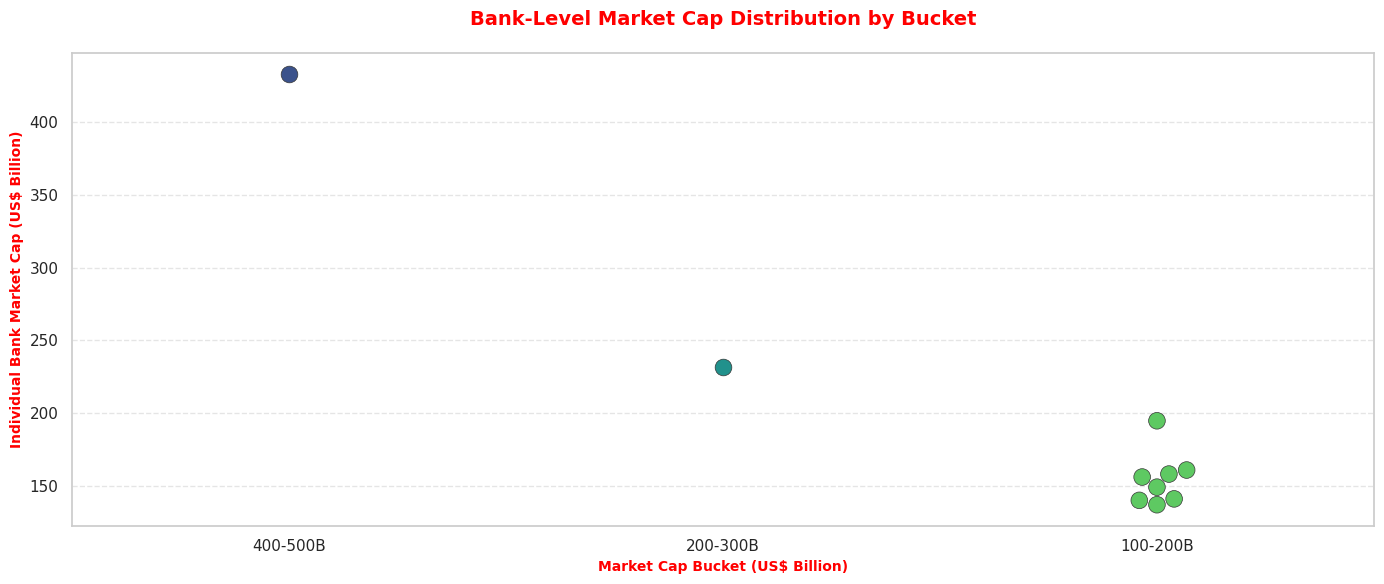

In [ ]:
# Visualise Market Cap Bucket (US$ Billion)
bank_pd=spark_df.toPandas()
plt.figure(figsize=(14, 6))
# Swarmplot with styling
sns.swarmplot(data=bank_pd,x='Market_Cap_Range',y='Market_Cap_USD_Billion',palette='viridis',size=12,linewidth=0.5)
plt.title("Bank-Level Market Cap Distribution by Bucket", fontsize=14, weight='bold',color='red', pad=20)
plt.xlabel("Market Cap Bucket (US$ Billion)", fontsize=10, weight='bold',color='red')
plt.ylabel("Individual Bank Market Cap (US$ Billion)", fontsize=10, weight='bold',color='red')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

📊 Observations: Suyash Nagar

-	Swarm plot helped in visually representing individual datapoints

- 3 Key growth metrics, helped in layered comparison of financial positioning for each bank entity

  - Gap from Leader
  - Gap from Preceding

- Gap from Successor
- JP Morgan Chase leads by a wide margin, with large gaps from immediate peers
- Most bank show tight clustering with neighbours


##4.2.**Market Concentration Analysis** <font color = red>[6 marks]</font> <br>

Q: Analyze Market Concentration and Categorize Banks Based on Market Share Tiers

In [ ]:
from ast import alias
from itertools import groupby
# Market Concentration Analysis
log_progress("Starting : Market Concentration Analysis")
# Add Tier details to data

spark_df = spark_df.withColumn(
    "Market_Share_Tier",
    when(col("Market_Share_%") > 15, "Tier1(>15)")
    .when(col("Market_Share_%") > 10, "Tier2(>10)")
    .when(col("Market_Share_%") > 5, "Tier3(>5)")
    .otherwise("Other")
)

# Show Concentration by grouping
concentration_df = spark_df.select("Bank_Name", "Market_Share_Tier", "Market_Share_%", "Market_Cap_USD_Billion") \
    .groupBy("Market_Share_Tier") \
    .agg(
        count("Bank_Name").alias("Bank_Count"),
        round(sum("Market_Share_%"), 2).alias("Total_Market_Share_%"),
        round(avg("Market_Cap_USD_Billion"), 2).alias("Average_Market_Cap_USD_Billion")
    ) \
    .orderBy("Market_Share_Tier")

concentration_df.show()



log_progress("Completed : Market Concentration Analysis")

+-----------------+----------+--------------------+------------------------------+
|Market_Share_Tier|Bank_Count|Total_Market_Share_%|Average_Market_Cap_USD_Billion|
+-----------------+----------+--------------------+------------------------------+
|       Tier1(>15)|         1|               22.79|                        432.92|
|       Tier2(>10)|         2|               22.43|                        213.04|
|        Tier3(>5)|         7|               54.78|                        148.69|
+-----------------+----------+--------------------+------------------------------+



Top 3 Share: 45.22%
Top 5 Share: 61.99%


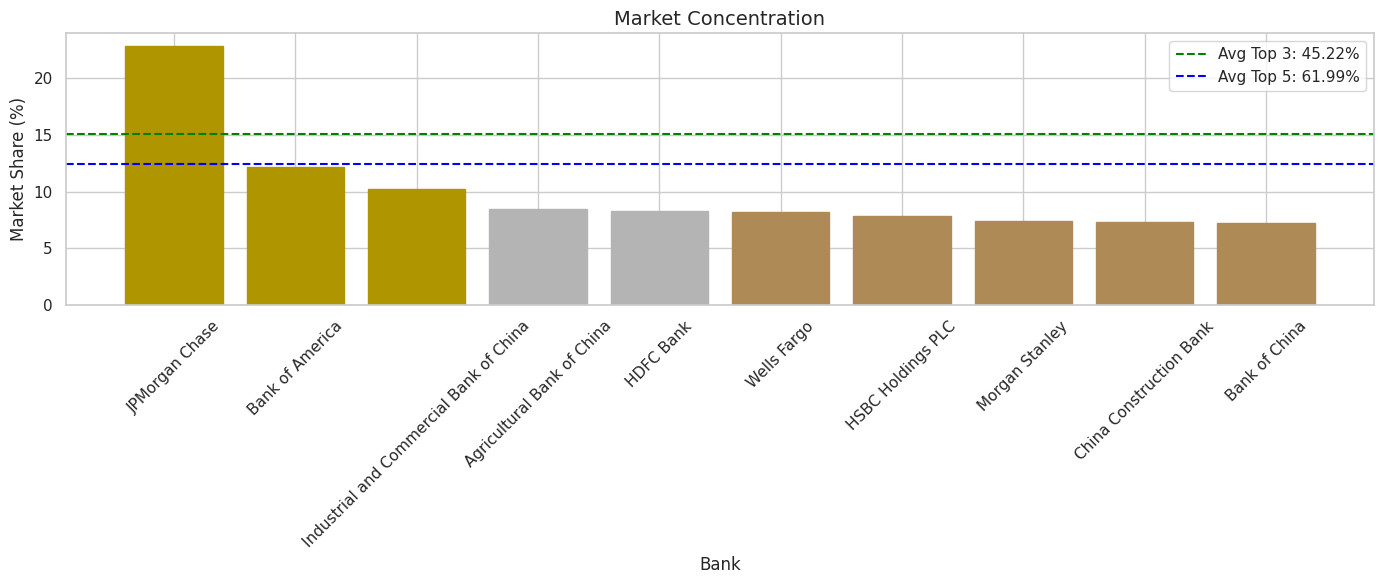

In [ ]:
# Market Concentration Analysis
log_progress("Starting Market Concentration Analysis")
#converting pyspark df to pandas df
bank_pd=spark_df.toPandas()
top_3_share = bank_pd.nlargest(3, 'Market_Share_%')['Market_Share_%'].sum()
top_5_share = bank_pd.nlargest(5, 'Market_Share_%')['Market_Share_%'].sum()
print(f"Top 3 Share: {top_3_share:.2f}%")
print(f"Top 5 Share: {top_5_share:.2f}%")
# Ploting Market Concentration
plt.figure(figsize=(14, 6))
bars = plt.bar(bank_pd['Bank_Name'], bank_pd['Market_Share_%'], color='steelblue')

# Highlight top 3 and top 5
for i, bar in enumerate(bars):
    if i < 3:
        bar.set_color('#AF9500') #gold
    elif i < 5:
        bar.set_color('#B4B4B4') #silver
    else:
        bar.set_color('#AD8A56') #Bronze

# Annotate top share stats
plt.title("Market Concentration", fontsize=14)
plt.ylabel("Market Share (%)")
plt.xlabel("Bank")
plt.axhline(y=top_3_share / 3, color='green', linestyle='--', label=f"Avg Top 3: {top_3_share:.2f}%")
plt.axhline(y=top_5_share / 5, color='blue', linestyle='--', label=f"Avg Top 5: {top_5_share:.2f}%")
plt.xticks(rotation=45)
plt.legend()
#plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

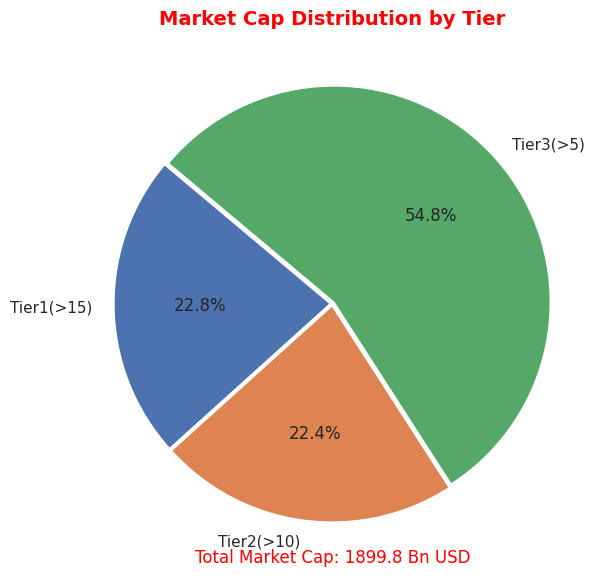

In [ ]:
tier_market_cap = bank_pd.groupby('Market_Share_Tier')['Market_Cap_USD_Billion'].sum().sort_index()

# Pie chart
plt.figure(figsize=(8, 6))
explode = [0.01] * len(tier_market_cap)
plt.pie(tier_market_cap.values,labels=tier_market_cap.index,autopct='%1.1f%%',startangle=140,explode=explode)
plt.title("Market Cap Distribution by Tier", fontsize=14, weight='bold',color='red')
plt.text(0, -1.2, f"Total Market Cap: {tier_market_cap.sum():.1f} Bn USD", ha='center', fontsize=12,color='red')
plt.tight_layout()
plt.show()


📊 Observations: Suyash Nagar

-	Market Concentration
  -	Tier 1 greater than 15%, Market share 22.79 with only 1 Bank
  - Tier 2 greater than 10%, Market share 22.43 with only 2 Bank
  - Tier 3 greater than 5%, Market share 54.78 with only 7 Bank

- The chart reveals a sharp concentration at the top, with JPMorgan Chase and Bank of America exceeding the 10% market share threshold

- Bar Chart Shows Tier into Gold , Silver and Bronze


##**4.3. Market Capitalization Distribution** <font color = red>[6 marks]</font> <br>

Q: Examine Statistical Distribution of Market Capitalization Using Quartile Analysis

In [ ]:
# Import required functions
from pyspark.sql.functions import (col, avg, sum, count, desc, asc, round, lag,
                                 dense_rank, ntile, when, first, lead, min, max, lit)
from pyspark.sql.window import Window

# Query 3: Statistical Distribution Analysis
log_progress("Starting : Statistical Distribution Analysis")
windows_specc = Window.orderBy(col("Market_Cap_USD_Billion"))
quartile_analysis = spark_df \
    .withColumn("percentile", ntile(4).over(windows_specc)) \
    .groupBy("percentile") \
    .agg(
        count("market_cap_usd_billion").alias("banks_in_quartile"),
        round(min("market_cap_usd_billion"), 2).alias("min_cap"),
        round(max("market_cap_usd_billion"), 2).alias("max_cap"),
        round(avg("market_cap_usd_billion"), 2).alias("avg_cap"),
        round(sum("market_cap_usd_billion"), 2).alias("total_cap")
    ) \
    .orderBy("percentile")
quartile_analysis.show()
quantiles = spark_df.approxQuantile("Market_Cap_USD_Billion", [0.25, 0.5, 0.75], 0.01)
Q1 , Q2 , Q3 = quantiles
print(f"Quantiles: {quantiles}")
# update cap size on dataframe
spark_df = spark_df.withColumn("Market_Cap_Quantile",
                                         when(col("Market_Cap_USD_Billion") <= Q1, "Q1: Small Cap")
                                         .when(col("Market_Cap_USD_Billion") <= Q2, "Q2: Lower Mid Cap")
                                         .when(col("Market_Cap_USD_Billion") <= Q3, "Q3: Upper Mid Cap")
                                         .otherwise("Q4: Large Cap")
                                         )
spark_df.select("Bank_Name", "Market_Cap_USD_Billion", "Market_Cap_Quantile").show()
quartile_counts = spark_df.groupBy("Market_Cap_Quantile").count().orderBy("Market_Cap_Quantile")
quartile_counts.show()
log_progress("Completed : Statistical Distribution Analysis")


+----------+-----------------+-------+-------+-------+---------+
|percentile|banks_in_quartile|min_cap|max_cap|avg_cap|total_cap|
+----------+-----------------+-------+-------+-------+---------+
|         1|                3| 136.81| 140.83| 139.15|   417.46|
|         2|                3|  148.9| 157.91| 154.23|   462.68|
|         3|                2| 160.68| 194.56| 177.62|   355.24|
|         4|                2| 231.52| 432.92| 332.22|   664.44|
+----------+-----------------+-------+-------+-------+---------+

Quantiles: [140.83, 155.87, 194.56]
+--------------------+----------------------+-------------------+
|           Bank_Name|Market_Cap_USD_Billion|Market_Cap_Quantile|
+--------------------+----------------------+-------------------+
|      JPMorgan Chase|                432.92|      Q4: Large Cap|
|     Bank of America|                231.52|      Q4: Large Cap|
|Industrial and Co...|                194.56|  Q3: Upper Mid Cap|
|Agricultural Bank...|                160.68|  

/tmp/ipython-input-227034254.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_spark_df, x="Market_Cap_Quantile", y="Cumulative_Market_Share_USD_Billion",palette="viridis")


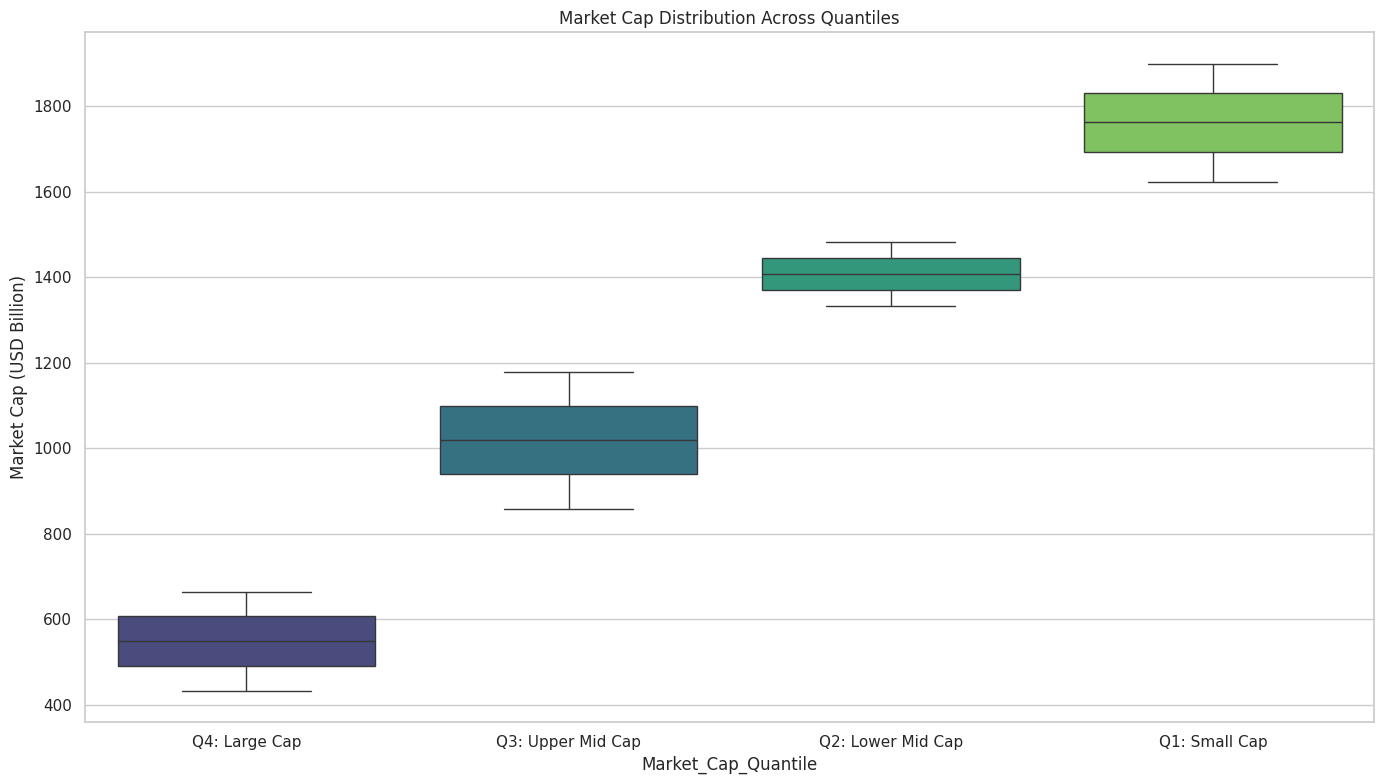

In [ ]:
bank_spark_df = spark_df.toPandas()
plt.figure(figsize=(14,8))
#bank_pd = bank_spark_df.select("Market_Cap_USD_Billion", "Market_Cap_Quantile").toPandas()
sns.boxplot(data=bank_spark_df, x="Market_Cap_Quantile", y="Cumulative_Market_Share_USD_Billion",palette="viridis")
plt.title("Market Cap Distribution Across Quantiles")
plt.ylabel("Market Cap (USD Billion)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2741413141.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quartile_count,x="count",y="Market_Cap_Quantile",palette="crest" )


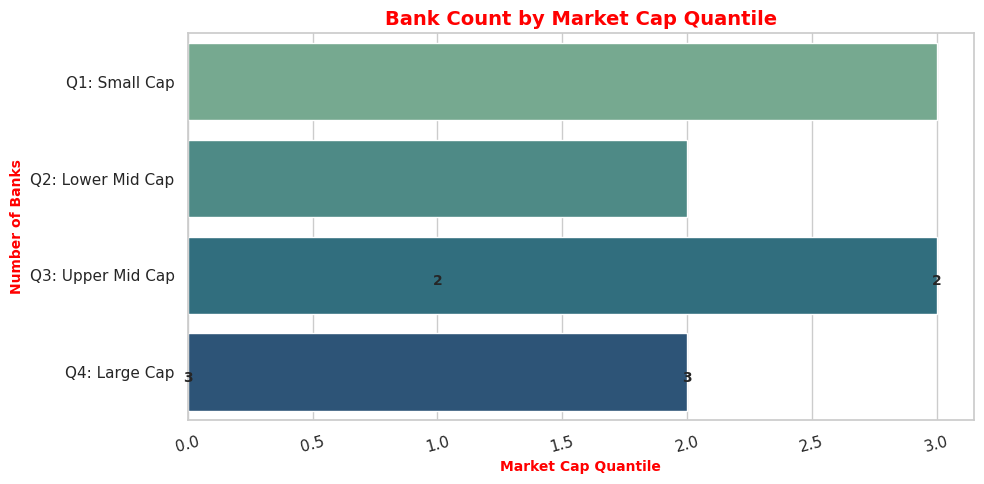

In [ ]:
quartile_count = quartile_counts.toPandas().sort_values("Market_Cap_Quantile")
plt.figure(figsize=(10, 5))
sns.barplot(data=quartile_count,x="count",y="Market_Cap_Quantile",palette="crest" )
for index, row in quartile_count.iterrows():
    plt.text(index, row['count'] + 0.1, row['count'], ha='center', fontsize=10, fontweight='bold')
plt.title("Bank Count by Market Cap Quantile", fontsize=14, weight='bold',color='red')
plt.xlabel("Market Cap Quantile",fontsize=10, weight='bold',color='red')
plt.ylabel("Number of Banks",fontsize=10, weight='bold',color='red')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

📊 Observations: Suyash Nagar

- Clear signs of bottom-heavy distribution
- Q4 (Large Cap) includes only two banks—JPMorgan Chase and Bank of America—with significantly higher market caps.
- Q1 (Small Cap) contains four banks clustered tightly below the $140.83B threshold, indicating a dense lower tier.
- The mid-cap tiers (Q2 and Q3) show gradual transitions, but the overall structure confirms a top-heavy distribution with sharp financial asymmetry.
- The horizontal bar chart shows a balanced distribution of banks across quantiles, with Q1 (Small Cap) and Q4 (Large Cap) each containing 3 banks, while Q2 and Q3 hold 2 banks each.


##**4.4. Comparative Size Analysis** <font color = red>[6 marks]</font> <br>

Q: Conduct Comparative Size Analysis to Classify Banks by Relative Market Size

In [ ]:
# Comparative Size Analysis
log_progress("Starting Comparative Size Analysis")

agg_result = spark_df.agg(avg("Market_Cap_USD_Billion").alias("avg_market_cap"),max("Market_Cap_USD_Billion").alias("max_market_cap")).first()
average_market_cap = agg_result["avg_market_cap"]  #average
max_market_cap = agg_result["max_market_cap"] #Max
print(f"Average Market Cap: {average_market_cap:.2f}B")
print(f"Max Market Cap: {max_market_cap:.2f}B")

spark_df = spark_df.withColumn("Size_vs_Avg",round(col("Market_Cap_USD_Billion") / lit(average_market_cap),2)).withColumn("Size_vs_Top",round(col("Market_Cap_USD_Billion") / lit(max_market_cap),2))

spark_df = spark_df.withColumn("Market_Size_Category",when(col("Size_vs_Avg") >= 1.5, "Large (>= 1.5x Average)").when(col("Size_vs_Avg") >= 0.8, "Medium (0.8x - 1.5x Average)").otherwise("Small (< 0.8x Average)"))
print("Comparative Size Analysis Results:")
spark_df.select("Bank_Name", "Market_Cap_USD_Billion", "Size_vs_Avg", "Size_vs_Top", "Market_Size_Category").show(truncate=False)
#bank_pd_df=spark_df.toPandas()

Average Market Cap: 189.98B
Max Market Cap: 432.92B
Comparative Size Analysis Results:
+---------------------------------------+----------------------+-----------+-----------+----------------------------+
|Bank_Name                              |Market_Cap_USD_Billion|Size_vs_Avg|Size_vs_Top|Market_Size_Category        |
+---------------------------------------+----------------------+-----------+-----------+----------------------------+
|JPMorgan Chase                         |432.92                |2.28       |1.0        |Large (>= 1.5x Average)     |
|Bank of America                        |231.52                |1.22       |0.53       |Medium (0.8x - 1.5x Average)|
|Industrial and Commercial Bank of China|194.56                |1.02       |0.45       |Medium (0.8x - 1.5x Average)|
|Agricultural Bank of China             |160.68                |0.85       |0.37       |Medium (0.8x - 1.5x Average)|
|HDFC Bank                              |157.91                |0.83       |0.36       

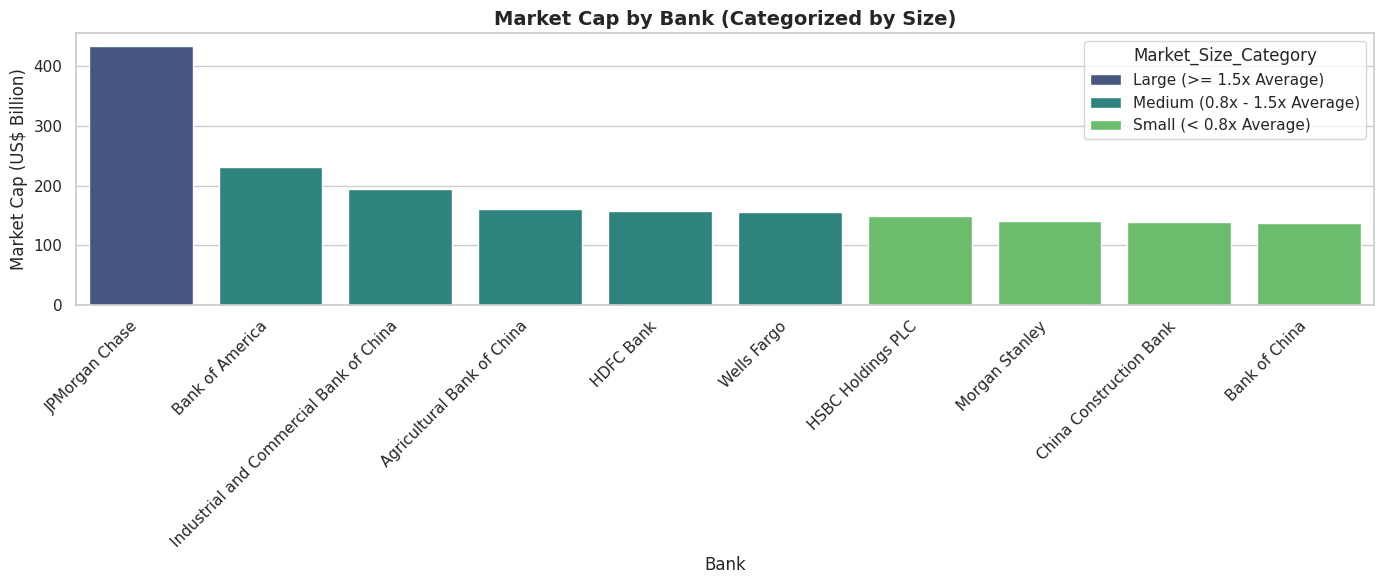

In [ ]:
bank_pd_df= spark_df.toPandas()
plt.figure(figsize=(14, 6))
sns.barplot(data=bank_pd_df, x='Bank_Name', y='Market_Cap_USD_Billion', hue='Market_Size_Category', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Market Cap by Bank (Categorized by Size)", fontsize=14, weight='bold')
plt.ylabel("Market Cap (US$ Billion)")
plt.xlabel("Bank")
plt.tight_layout()
plt.show()


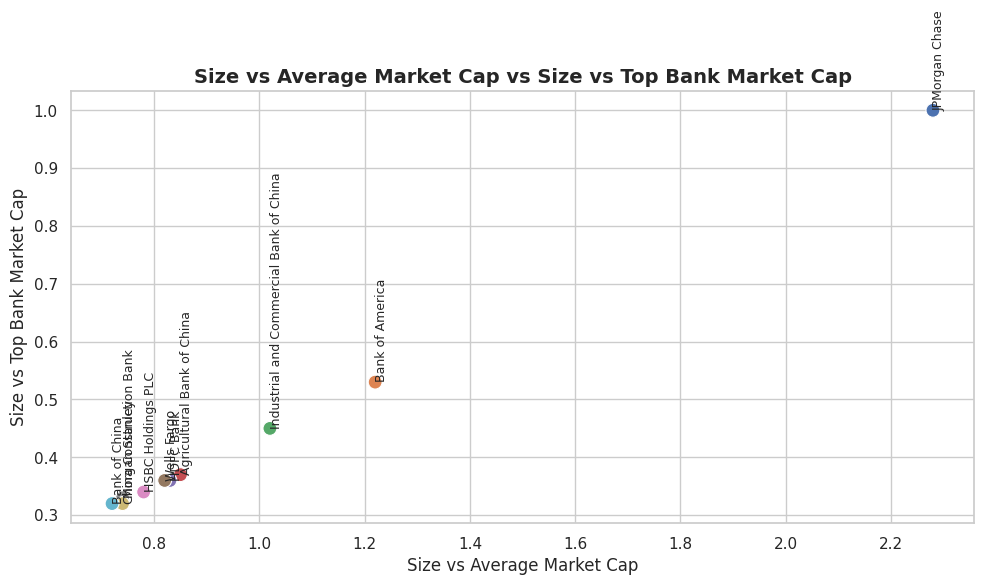

In [ ]:
# Scatter Plot: Size_vs_Avg vs Size_vs_Top
log_progress("Generating Scatter Plot: Size_vs_Avg vs Size_vs_Top")

# Convert necessary columns to Pandas DataFrame for visualization
size_comparison_pd = spark_df.select("Size_vs_Avg", "Size_vs_Top", "Bank_Name").toPandas()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size_vs_Avg', y='Size_vs_Top', data=size_comparison_pd, hue='Bank_Name', s=100,legend=False)

# Add labels for each point
for i, row in size_comparison_pd.iterrows():
    plt.text(row['Size_vs_Avg'], row['Size_vs_Top'], row['Bank_Name'], fontsize=9, ha='left', va='bottom',rotation=90)

plt.title('Size vs Average Market Cap vs Size vs Top Bank Market Cap', fontsize=14, weight='bold')
plt.xlabel('Size vs Average Market Cap', fontsize=12)
plt.ylabel('Size vs Top Bank Market Cap', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

log_progress("Scatter Plot: Size_vs_Avg vs Size_vs_Top Visualization Completed")

📊 Observations: Suyash Nagar

- JPMorgan Chase is the only bank classified as “Large”, with a market cap more than 1.5× the average, while most others fall into the “Medium” category

- Presence of sharp size disparity, where one dominant player significantly skews the average

- The scatter plot clearly illustrates JPMorgan Chase dominance, positioned farthest from the origin with the highest ratios in both dimensions—Size vs Average and Size vs Top Bank.

- All other banks cluster in the lower-left quadrant, indicating limited deviation from the average and significant distance from the top, reinforcing a highly skewed market structure with one outsized leader and a compressed competitive field.



##**4.5. Market Growth Analysis** <font color = red>[6 marks]</font> <br>

Q: Evaluate Market Growth and Identify Gaps Between Consecutive Banks

In [ ]:
# Growth and Gap Analysis
log_progress("Starting Market Growth Analysis and Gap Identification")

# Define a window specification ordered by rank
window_spec_rank = Window.orderBy("Rank")

# Calculate the market cap of the next bank
spark_df = spark_df.withColumn("Next_Market_Cap", lead("Market_Cap_USD_Billion", 1).over(window_spec_rank))

# Calculate the absolute gap in market cap between the current and next bank
spark_df = spark_df.withColumn("Gap_vs_Next",round(col("Market_Cap_USD_Billion") - col("Next_Market_Cap"),2)) \
          .withColumn("gap_percentage",
                round((col("Market_Cap_USD_Billion") - col("Next_Market_Cap")) * 100 / col("Market_Cap_USD_Billion"), 2))

print("Market Growth and Gap Analysis Results:")
# Show relevant columns including the previously calculated Market_Cap_Change_Pct_vs_Prev_Rank

spark_df.select('Bank_Name','Market_Cap_USD_Billion','Next_Market_Cap','Gap_vs_Next','gap_percentage').show()

Market Growth and Gap Analysis Results:
+--------------------+----------------------+---------------+-----------+--------------+
|           Bank_Name|Market_Cap_USD_Billion|Next_Market_Cap|Gap_vs_Next|gap_percentage|
+--------------------+----------------------+---------------+-----------+--------------+
|      JPMorgan Chase|                432.92|         231.52|      201.4|         46.52|
|     Bank of America|                231.52|         194.56|      36.96|         15.96|
|Industrial and Co...|                194.56|         160.68|      33.88|         17.41|
|Agricultural Bank...|                160.68|         157.91|       2.77|          1.72|
|           HDFC Bank|                157.91|         155.87|       2.04|          1.29|
|         Wells Fargo|                155.87|          148.9|       6.97|          4.47|
|   HSBC Holdings PLC|                 148.9|         140.83|       8.07|          5.42|
|      Morgan Stanley|                140.83|         139.82|       1.

/tmp/ipython-input-25292929.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bank_Name', y='Gap_vs_Next', data=bank_pd_df, palette='coolwarm')


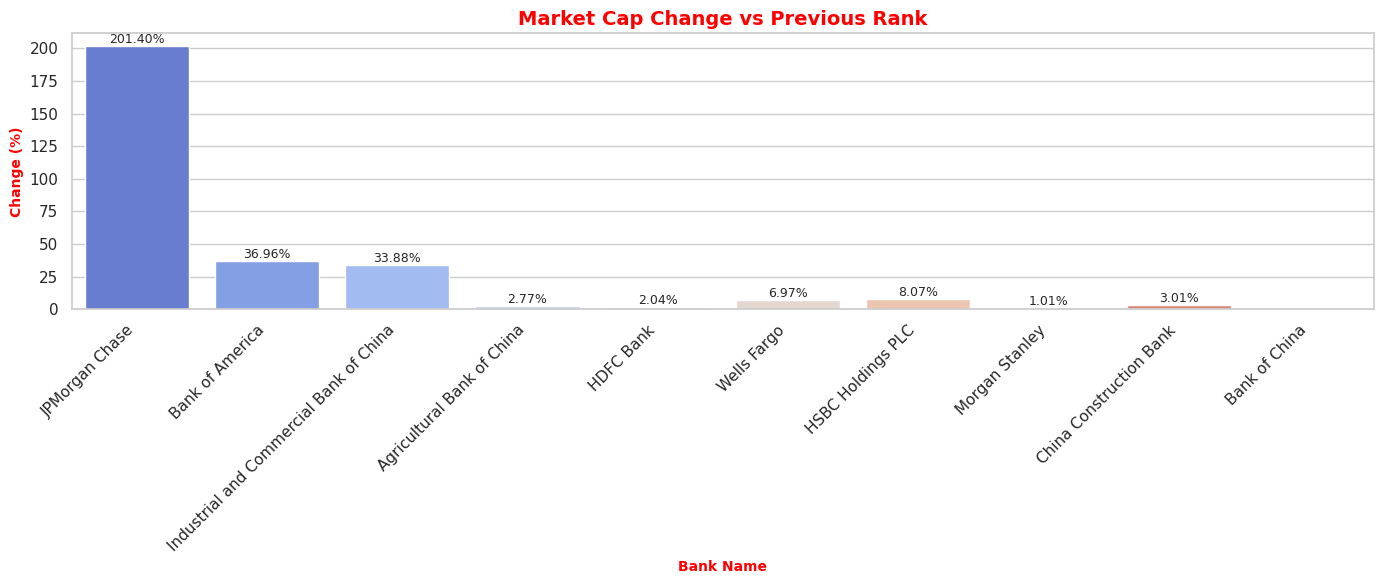

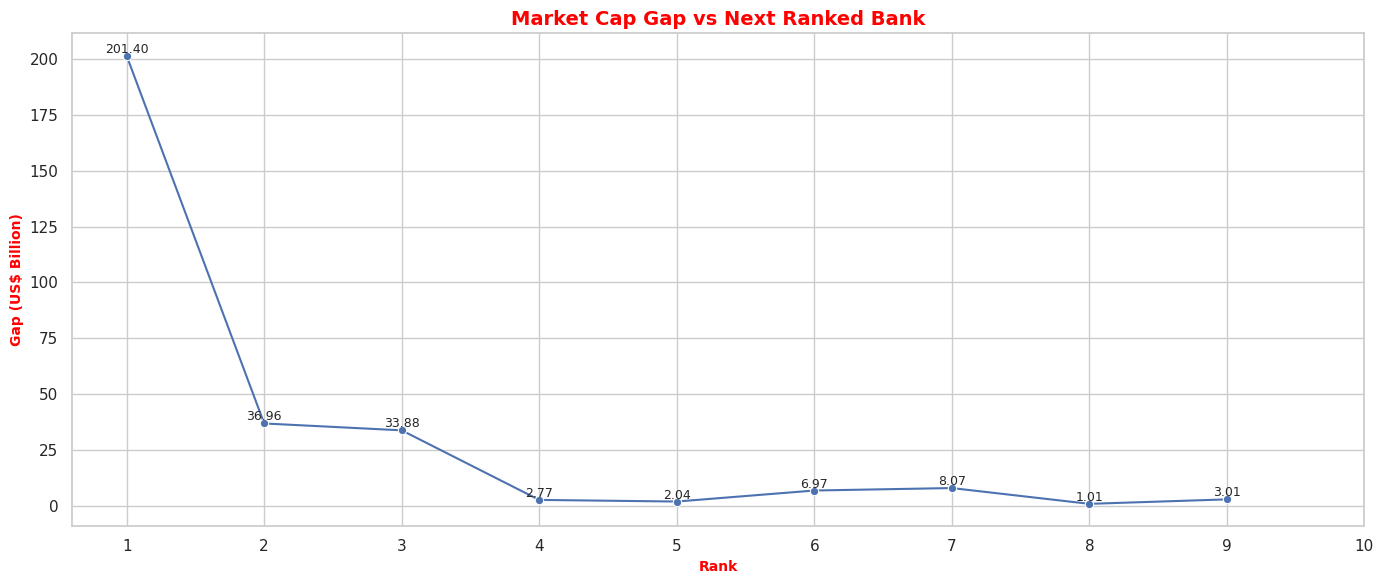

In [ ]:
# Convert to pandas for visualization
bank_pd_df = spark_df.toPandas()

# Visualize the Market Cap Change vs Previous Rank
plt.figure(figsize=(14, 6))
sns.barplot(x='Bank_Name', y='Gap_vs_Next', data=bank_pd_df, palette='coolwarm')
for index, row in bank_pd_df.iterrows():
    plt.text(row['Bank_Name'], row['Gap_vs_Next'], f"{row['Gap_vs_Next']:.2f}%", ha='center', va='bottom', fontsize=9)
plt.title("Market Cap Change vs Previous Rank", fontsize=14, weight='bold',color='red')
plt.xlabel("Bank Name",fontsize=10, weight='bold',color='red')
plt.ylabel("Change (%)",fontsize=10, weight='bold',color='red')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize the Gap vs Next Bank
plt.figure(figsize=(14, 6))
sns.lineplot(x='Rank', y='Gap_vs_Next', data=bank_pd_df, marker='o')
# Add text labels for the gap values
for i, row in bank_pd_df.dropna(subset=['Gap_vs_Next']).iterrows():
    plt.text(row['Rank'], row['Gap_vs_Next'], f"{row['Gap_vs_Next']:.2f}", ha='center', va='bottom', fontsize=9)

plt.title("Market Cap Gap vs Next Ranked Bank",fontsize=14, weight='bold',color='red')
plt.xlabel("Rank", fontsize=10, weight='bold',color='red')
plt.ylabel("Gap (US$ Billion)", fontsize=10, weight='bold',color='red')
plt.xticks(bank_pd_df['Rank']) # Set x-ticks to be the ranks
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Observations: Suyash Nagar

- Massive drop-off of $201.4B (46.52%) between JPMorgan Chase and Bank of America

- Subsequent gaps are notably smaller, with most banks showing single-digit percentage declines, indicating a steep initial fall followed by a more gradual tapering across the leaderboard


##**4.6. Market Dominance Analysis** <font color = red>[6 marks]</font> <br>

Q: Assess Market Dominance by Measuring Cumulative Share and Dominance Score

In [ ]:
# Market Dominance Analysis
log_progress("Market Dominance Analysis")
window_spec = Window.orderBy(desc("Market_Cap_USD_Billion"))
windowless_spec = Window.partitionBy(lit(1))  # This creates a window over all rows

spark_df = spark_df.withColumn("rank", dense_rank().over(window_spec)) \
    .withColumn("Cumulative_Market_Share_USD_Billion", sum("Market_Cap_USD_Billion").over(window_spec)) \
    .withColumn("Dominance_Score", round(col("Market_Cap_USD_Billion") * col("rank") /
                                         sum("Market_Cap_USD_Billion").over(windowless_spec), 2)) \
    .withColumn("Dominance_Level",
                when(col("Dominance_Score") < 0.25, "High Dominance")
                .when(col("Dominance_Score") < 0.50, "Moderate Dominance")
                .otherwise("Low Dominance"))

spark_df.select('rank','Bank_Name','Market_Cap_USD_Billion','Dominance_Score','Dominance_Level').show()


+----+--------------------+----------------------+---------------+------------------+
|rank|           Bank_Name|Market_Cap_USD_Billion|Dominance_Score|   Dominance_Level|
+----+--------------------+----------------------+---------------+------------------+
|   1|      JPMorgan Chase|                432.92|           0.23|    High Dominance|
|   2|     Bank of America|                231.52|           0.24|    High Dominance|
|   3|Industrial and Co...|                194.56|           0.31|Moderate Dominance|
|   4|Agricultural Bank...|                160.68|           0.34|Moderate Dominance|
|   5|           HDFC Bank|                157.91|           0.42|Moderate Dominance|
|   6|         Wells Fargo|                155.87|           0.49|Moderate Dominance|
|   7|   HSBC Holdings PLC|                 148.9|           0.55|     Low Dominance|
|   8|      Morgan Stanley|                140.83|           0.59|     Low Dominance|
|   9|China Constructio...|                139.82|    

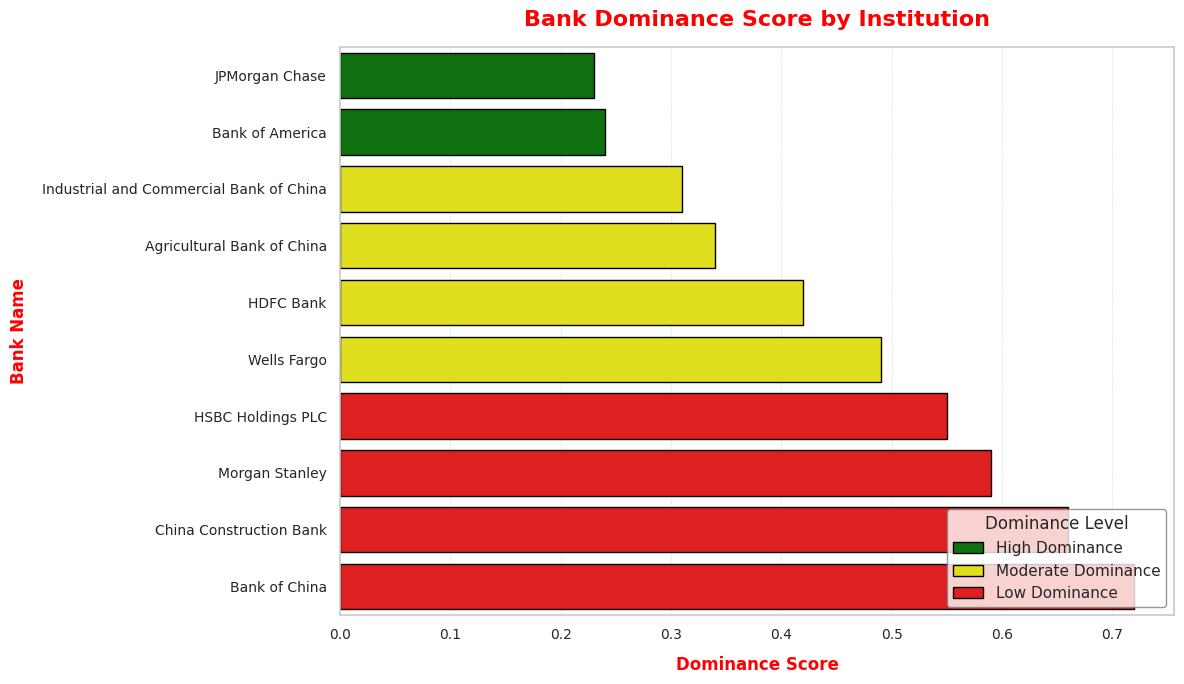

In [ ]:
# Convert Spark DataFrame to Pandas
df = spark_df.toPandas()

# Sort by Dominance Score
df_sorted = df.sort_values('Dominance_Score')

# Define color map for Dominance Level
color_map = {
    'High Dominance': 'green',      # green
    'Moderate Dominance': 'yellow',  # amber/yellow
    'Low Dominance': 'red'        # red
}

# Set plot style
sns.set(style="whitegrid", context="notebook")

plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    x='Dominance_Score',
    y='Bank_Name',
    data=df_sorted,
    hue='Dominance_Level',
    dodge=False,
    palette=color_map,
    edgecolor='black'
)

# Title and axis labels
plt.title('Bank Dominance Score by Institution', fontsize=16, weight='bold', color='red', pad=15)
plt.xlabel('Dominance Score', fontsize=12, weight='bold', color='red', labelpad=10)
plt.ylabel('Bank Name', fontsize=12, weight='bold', color='red', labelpad=10)

# Legend styling
plt.legend(
    title='Dominance Level',
    title_fontsize=12,
    fontsize=11,
    loc='lower right',
    frameon=True,
    facecolor='white',
    edgecolor='gray'
)

# Grid and layout
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


/tmp/ipython-input-865779773.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


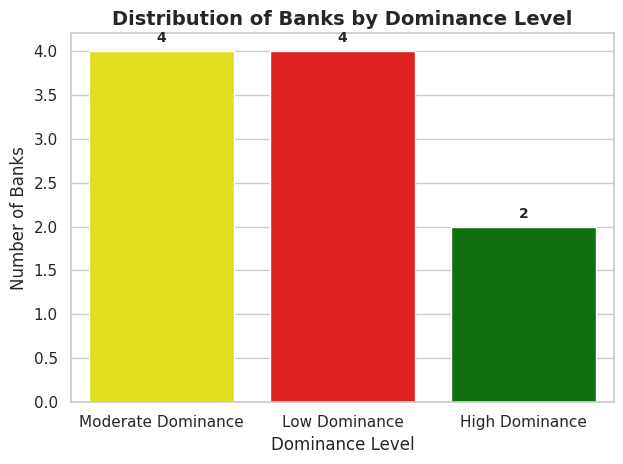

In [ ]:
dominance_counts = df['Dominance_Level'].value_counts().reset_index()
dominance_counts.columns = ['Dominance_Level', 'Count']

sns.barplot(
    x='Dominance_Level',
    y='Count',
    data=dominance_counts,
    palette=color_map
)
for index, row in dominance_counts.iterrows():
    plt.text(index, row['Count'] + 0.1, row['Count'], ha='center', fontsize=10, fontweight='bold')
plt.title('Distribution of Banks by Dominance Level', fontsize=14, weight='bold')
plt.xlabel('Dominance Level')
plt.ylabel('Number of Banks')
plt.tight_layout()
plt.show()


📊 Observations: Suyash Nagar

- High Dominance: Only 2 banks, including JPMorgan Chase, exert outsized influence.

- Moderate Dominance: 4 banks occupy the strategic middle ground—likely balancing scale with agility.

- Low Dominance: Another 4 banks fall into this tier, suggesting limited market leverage despite respectable capitalization.


##**4.7. Segment-Wise Bank Analysis** <font color = red>[6 marks]</font> <br>

Q: Analyze Segment-Wise Bank Performance Based on Market Capitalization Ranges

In [ ]:
# Segment Performance Analysis
log_progress("Starting Segment Performance Analysis")
segment_performance = spark_df.groupBy("Market_Size_Category").agg(
    count("*").alias("Number_of_Banks"),
    round(avg("Market_Cap_USD_Billion"), 2).alias("Average_Market_Cap_USD_Billion")
).orderBy("Average_Market_Cap_USD_Billion", ascending=False)

segment_performance.show()

+--------------------+---------------+------------------------------+
|Market_Size_Category|Number_of_Banks|Average_Market_Cap_USD_Billion|
+--------------------+---------------+------------------------------+
|Large (>= 1.5x Av...|              1|                        432.92|
|Medium (0.8x - 1....|              5|                        180.11|
|Small (< 0.8x Ave...|              4|                        141.59|
+--------------------+---------------+------------------------------+



In [ ]:
segment_analysis= spark_df.groupBy("Market_Cap_Quantile").agg(
    avg("Dominance_Score").alias("Avg_Dominance"),
    sum("Market_Share_%").alias("Total_Market_Share"),
    count("*").alias("Bank_Count")
).orderBy("Market_Cap_Quantile")
segment_analysis.show()

+-------------------+------------------+------------------+----------+
|Market_Cap_Quantile|     Avg_Dominance|Total_Market_Share|Bank_Count|
+-------------------+------------------+------------------+----------+
|      Q1: Small Cap|0.6566666666666666|             21.97|         3|
|  Q2: Lower Mid Cap|              0.52|             16.04|         2|
|  Q3: Upper Mid Cap|0.3566666666666667|27.010000000000005|         3|
|      Q4: Large Cap|             0.235|             34.98|         2|
+-------------------+------------------+------------------+----------+



##**4.8. Performance Dashboard** <font color = red>[6 marks]</font> <br>

Q: Generate a Comprehensive Performance Dashboard for Bank Rankings and Metrics

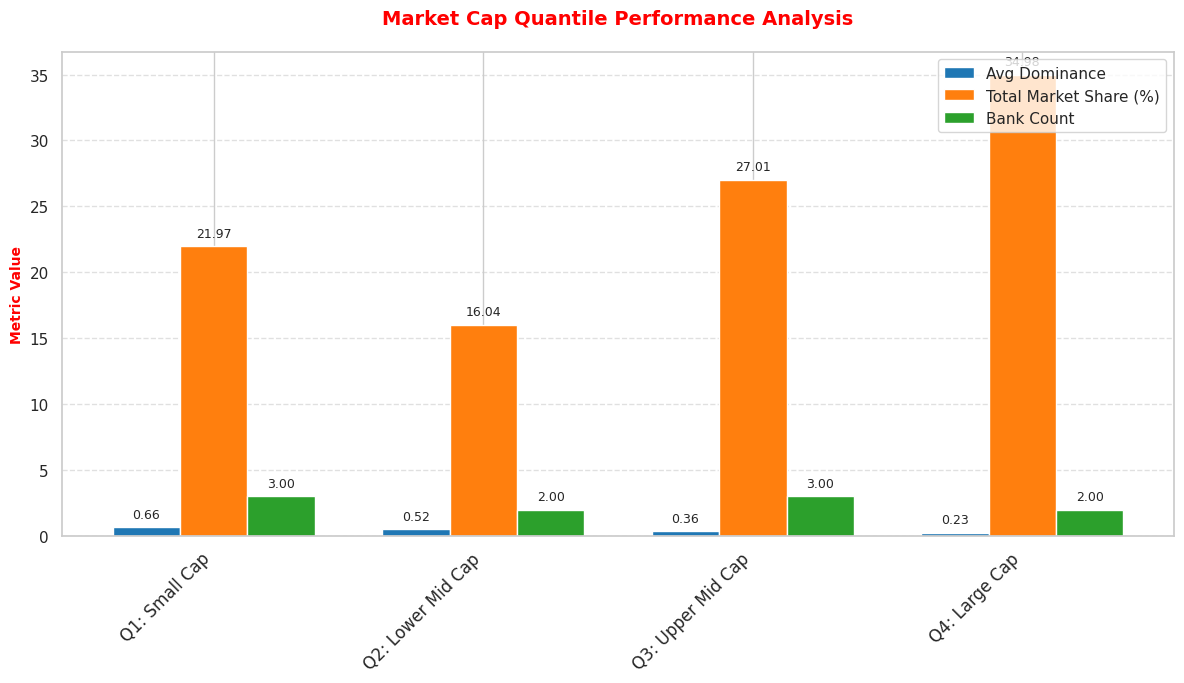

In [ ]:

# Convert Spark DataFrame to Pandas
df = segment_analysis.toPandas()
fig, ax1 = plt.subplots(figsize=(12, 7))
bar_width = 0.25
x = range(len(df))
# Plot each metric
bars1 = ax1.bar([p - bar_width for p in x], df['Avg_Dominance'], width=bar_width, label='Avg Dominance', color='#1f77b4')
bars2 = ax1.bar(x, df['Total_Market_Share'], width=bar_width, label='Total Market Share (%)', color='#ff7f0e')
bars3 = ax1.bar([p + bar_width for p in x], df['Bank_Count'], width=bar_width, label='Bank Count', color='#2ca02c')
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# X-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(df['Market_Cap_Quantile'], rotation=45, ha='right', fontsize=12)
# Titles and labels
plt.title('Market Cap Quantile Performance Analysis', fontsize=14, weight='bold',color='red', pad=20)
ax1.set_ylabel('Metric Value', fontsize=10, weight='bold',color='red')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

📊 Observations: Suyash Nagar
-	Q1 : Small Cap
  - Average Dominance of 0.66 (Highest)
  - Market Share of 21.97%
  - Count of Banks 2

- Q2 : Lower Mid Cap
  - Average Dominance of 0.60
  - Market Share of 16.04%
  - Count of Banks 2

- Q3 : Upper Mid Cap
  - Average Dominance of 0.66 (Highest)
  - Market Share of 21.97%
  - Count of Banks 3

- Q1 : Large Cap
  - Average Dominance of 0.63
  - Market Share of 34.98% (Highest)
  - Count of Banks 3

Q1 Large Cap – Dominates market share but doesnt have dominance score – suggesting concentration by top ranked banks like JP Morgan and Bank of America


In [ ]:
#Upload final processed data to AWS S3
Banking_Final_Processed = spark_df.toPandas()
upload_df(Banking_Final_Processed,"Banking_Final_Processed")

Saved to Google Drive at: /content/sample_data/IIIT_Assignments/Banking_Final_Processed.csv
Uploaded to S3: s3://myaswss3bucket/BankingDataSet/Banking_Final_Processed.csv


#5. Visualization Integration

In [ ]:
# Visualization Setup Section

# 1. Prepare data for visualization platforms
def prepare_for_visualization(s3_bucket_name, s3_file_path):
    """
    Prepare the data stored in S3 for visualization platforms
    """
    try:
        # Initialize S3 client
        s3_client = boto3.client('s3')

        # Create a direct access URL (temporary)
        url = s3_client.generate_presigned_url(
            'get_object',
            Params={'Bucket': s3_bucket_name, 'Key': s3_file_path},
            ExpiresIn=3600  # URL expires in 1 hour
        )

        # Save connection details
        connection_details = {
            "s3_bucket": s3_bucket_name,
            "s3_path": s3_file_path,
            "access_key": os.environ['AWS_ACCESS_KEY_ID'],
            "secret_key": os.environ['AWS_SECRET_ACCESS_KEY'],
            "region": os.environ['AWS_DEFAULT_REGION'],
            "temp_url": url
        }

        return connection_details

    except Exception as e:
        print(f"Error preparing visualization connection: {str(e)}")
        return None

# 2. Generate Tableau connection instructions
# 3. Generate Power BI connection instructions
def generate_powerbi_instructions(connection_details):
    """
    Generate instructions for connecting Power BI to the S3 data
    """
    instructions = """
    Power BI Connection Instructions:
    ------------------------------
    1. Open Power BI Desktop
    2. Click 'Get Data' -> 'Amazon S3'
    3. Enter the following information:
        - URL: s3://{s3_bucket}/{s3_path}
        - Access Key ID: {access_key}
        - Secret Access Key: {secret_key}
        - Region: {region}

    Alternative Method:
    -----------------
    1. Use "Web" connector in Power BI
    2. Use the following temporary URL (valid for 1 hour):
    {temp_url}

    Recommended DAX Measures:
    ----------------------
    1. Market Share % =
       DIVIDE([Market Cap], CALCULATE(SUM([Market Cap]), ALL(Banks)))

    2. Running Total =
       CALCULATE(SUM([Market Cap]),
                FILTER(ALL(Banks),
                      Banks[Rank] <= MAX(Banks[Rank])))

    Recommended Visualizations:
    ------------------------
    1. Market Cap Decomposition (Waterfall Chart)
    2. Bank Comparison (Matrix Visual)
    3. Regional Analysis (Map Visual)
    4. Currency Distribution (Donut Chart)
    5. Performance Dashboard (Key Influencers)
    """.format(**connection_details)

    return instructions

# 4. Execute visualization setup
if __name__ == "__main__":
    try:
        # Prepare connection details
        connection_details = prepare_for_visualization(s3_bucket_name, s3_file_path)

        if connection_details:
            # Generate and save Tableau instructions
            tableau_instructions = generate_tableau_instructions(connection_details)
            with open('tableau_connection_guide.txt', 'w') as f:
                f.write(tableau_instructions)
            print("Tableau connection guide saved to 'tableau_connection_guide.txt'")

            # Generate and save Power BI instructions
            powerbi_instructions = generate_powerbi_instructions(connection_details)
            with open('powerbi_connection_guide.txt', 'w') as f:
                f.write(powerbi_instructions)
            print("Power BI connection guide saved to 'powerbi_connection_guide.txt'")

            # Print success message
            print("""
            Visualization Setup Complete!
            ---------------------------
            1. Connection guides have been generated for both Tableau and Power BI
            2. Follow the instructions in the respective guide files to connect
            3. Use the recommended visualizations as starting points
            4. Note: The temporary URL expires in 1 hour
            """)

    except Exception as e:
        print(f"Error in visualization setup: {str(e)}")

# 5. Sample Dashboard Layout (Documentation)
dashboard_layout = """
Recommended Dashboard Layout:
--------------------------
1. Overview Dashboard:
   - KPI Cards: Total Market Cap, Average Bank Size, Number of Banks
   - Market Cap Distribution Chart
   - Geographic Distribution Map
   - Top 10 Banks Table

2. Currency Analysis Dashboard:
   - Currency Comparison Matrix
   - Exchange Rate Impact Chart
   - Regional Performance Indicators
   - Currency Correlation Heatmap

3. Performance Metrics Dashboard:
   - Bank Rankings
   - Market Share Analysis
   - Year-over-Year Growth
   - Peer Comparison Chart

4. Risk Analysis Dashboard:
   - Market Concentration Metrics
   - Regional Exposure
   - Size Distribution Analysis
   - Trend Indicators
"""

print(dashboard_layout)

Error in visualization setup: name 's3_bucket_name' is not defined

Recommended Dashboard Layout:
--------------------------
1. Overview Dashboard:
   - KPI Cards: Total Market Cap, Average Bank Size, Number of Banks
   - Market Cap Distribution Chart
   - Geographic Distribution Map
   - Top 10 Banks Table

2. Currency Analysis Dashboard:
   - Currency Comparison Matrix
   - Exchange Rate Impact Chart
   - Regional Performance Indicators
   - Currency Correlation Heatmap

3. Performance Metrics Dashboard:
   - Bank Rankings
   - Market Share Analysis
   - Year-over-Year Growth
   - Peer Comparison Chart

4. Risk Analysis Dashboard:
   - Market Concentration Metrics
   - Regional Exposure
   - Size Distribution Analysis
   - Trend Indicators



In [ ]:
import os

# List files in the pyspark jars directory
pyspark_jars_dir = "/usr/local/lib/python3.10/dist-packages/pyspark/jars/"
print(f"Contents of {pyspark_jars_dir}:")
try:
    for filename in os.listdir(pyspark_jars_dir):
        print(filename)
except FileNotFoundError:
    print(f"Directory not found: {pyspark_jars_dir}")

# Print Spark configuration related to classpath and S3
print("\nSpark Configuration:")
spark_conf = spark.sparkContext.getConf()
conf_keys = ["spark.driver.extraClassPath", "spark.executor.extraClassPath", "spark.jars.packages", "spark.hadoop.fs.s3a.impl"]
for key in conf_keys:
    print(f"{key}: {spark_conf.get(key)}")

Contents of /usr/local/lib/python3.10/dist-packages/pyspark/jars/:
Directory not found: /usr/local/lib/python3.10/dist-packages/pyspark/jars/

Spark Configuration:
spark.driver.extraClassPath: None
spark.executor.extraClassPath: None
spark.jars.packages: None
spark.hadoop.fs.s3a.impl: None
